# This notebook compares commonly used regression and classification algorithms!

# Regression 
- Multiple Linear Regression
- Polynomial Regression
- Decision Tree
- Random Forest
- Support Vector Regression
- ANN

# Classification 
- Logistic Regression
- Naive Bayes
- KNN
- Decision tree
- RF
- SVM
- ANN


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nnfs
from nnfs.datasets import spiral_data

import random
import tensorflow as tf
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.naive_bayes import GaussianNB

# Regression

Creating data

In [2]:
x1 = [i/10 for i in range(100)]
x2 = [i/10 + (random.uniform(0, 1)-0.5)*2 for i in range(100)]
y = [(random.uniform(0, 1)-0.5)*10 + x1[i] + x2[i] + (i*i)/100 + 5 for i in range(100)]
y = [int(j) for j in y]

Visualizing data

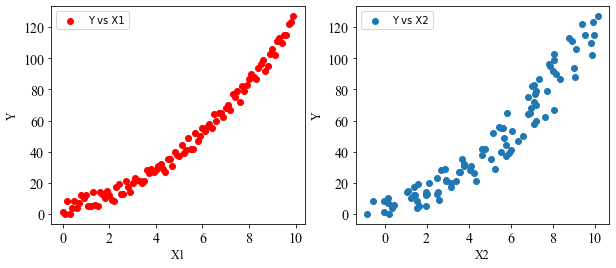

In [3]:
fig1, (ax11, ax12) = plt.subplots(ncols=2, figsize=(10, 4))

ax11.scatter(x1, y, label = 'Y vs X1', c = 'red')
ax12.scatter(x2, y, label = 'Y vs X2')

ax11.legend()
ax12.legend()

#ax11.set_title('zero')
#ax12.set_title('one')


ax11.set_xlabel('X1', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
ax11.set_ylabel('Y', fontdict={'fontname':'Times New Roman', 'fontsize': 12})

ax12.set_xlabel('X2', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
ax12.set_ylabel('Y', fontdict={'fontname':'Times New Roman', 'fontsize': 12})

plt.sca(ax11)
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')

plt.sca(ax12)
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')

#hist1 = ax11.hist2d(x1, x2, range=[(-5.5, 37), (30, 46)], bins=(500, 200), norm= cm.colors.LogNorm(vmin= 1, vmax= 10))
#cbar = fig.colorbar(hist1, ax = ax11)

#plt.xticks([0,2,4,6,8])
#plt.yticks([0,5,10,15])

plt.show()

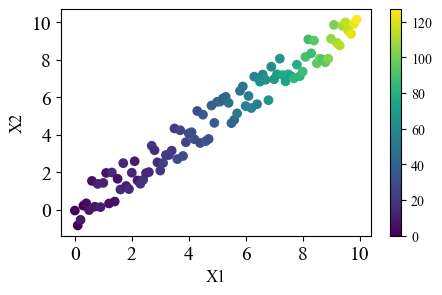

In [4]:
plt.figure(figsize=(5,3), dpi=100)
plt.scatter(x1, x2, label = 'Y vs X1, X2', c = y)
cb = plt.colorbar()
#ax = cb.ax
#text = ax.yaxis.label
#font = matplotlib.font_manager.FontProperties(family='times new roman', style='italic', size=16)
#text.set_font_properties(font)
#cb.ax.set_font_properties(font)
#cb.ax.tick_params(labelsize=12, fontname = 'Times New Roman')

for l in cb.ax.yaxis.get_ticklabels():
    l.set_family("Times New Roman")
    l.set_size(10)

plt.xlabel('X1', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.ylabel('X2', fontdict={'fontname':'Times New Roman', 'fontsize': 12})
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')
plt.show()

Data preprocessing

In [5]:
X = np.dstack((x1, x2))
X = X.reshape(-1, 2)
X.shape

(100, 2)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Without scaling

In [8]:
# Multiple linear regression
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination MLR: %.2f" % r2_score(y_test, y_pred))

# Polynomial regression
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly6 = PolynomialFeatures(6)
X_poly_2 = poly2.fit_transform(X)
X_poly_3 = poly3.fit_transform(X)
X_poly_6 = poly6.fit_transform(X)

X_train_poly2, X_test_poly2, y_train, y_test = train_test_split(X_poly_2, y, random_state=42)
X_train_poly3, X_test_poly3, y_train, y_test = train_test_split(X_poly_3, y, random_state=42)
X_train_poly6, X_test_poly6, y_train, y_test = train_test_split(X_poly_6, y, random_state=42)

polyregr2 = linear_model.LinearRegression()
polyregr3 = linear_model.LinearRegression()
polyregr6 = linear_model.LinearRegression()

# Train the model using the training sets
polyregr2.fit(X_train_poly2, y_train)
polyregr3.fit(X_train_poly3, y_train)
polyregr6.fit(X_train_poly6, y_train)

# Make predictions using the testing set
y_pred_poly2 = polyregr2.predict(X_test_poly2)
y_pred_poly3 = polyregr3.predict(X_test_poly3)
y_pred_poly6 = polyregr6.predict(X_test_poly6)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination Poly2: %.2f" % r2_score(y_test, y_pred_poly2))
print("Coefficient of determination Poly3: %.2f" % r2_score(y_test, y_pred_poly3))
print("Coefficient of determination Poly6: %.2f" % r2_score(y_test, y_pred_poly6))

# Decision tree regression
decision_tree_regr1 = DecisionTreeRegressor(max_depth=2)
decision_tree_regr1.fit(X_train, y_train)
y_pred_dec_tree1 = decision_tree_regr1.predict(X_test)
print("Coefficient of determination DT1: %.2f" % r2_score(y_test, y_pred_dec_tree1))
decision_tree_regr2 = DecisionTreeRegressor(splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
decision_tree_regr2.fit(X_train, y_train)
y_pred_dec_tree2 = decision_tree_regr2.predict(X_test)
print("Coefficient of determination DT2: %.2f" % r2_score(y_test, y_pred_dec_tree2))

# Random forest regression
rf_regr1 = RandomForestRegressor(max_depth=2, random_state=0)
rf_regr1.fit(X_train, y_train)
y_pred_rf_regr1 = rf_regr1.predict(X_test)
print("Coefficient of determination RF1: %.2f" % r2_score(y_test, y_pred_rf_regr1))
rf_regr2 = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf_regr2.fit(X_train, y_train)
y_pred_rf_regr2 = rf_regr2.predict(X_test)
print("Coefficient of determination RF2: %.2f" % r2_score(y_test, y_pred_rf_regr2))

# SVM regression
svm_lin = SVR(kernel='linear', C=100, gamma="auto")
svm_poly = SVR(kernel='poly', C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svm_lin.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_svm_lin = svm_lin.predict(X_test)
y_pred_svm_poly = svm_poly.predict(X_test)
y_pred_svm_rbf = svm_rbf.predict(X_test)

print("Coefficient of determination SVR lin: %.2f" % r2_score(y_test, y_pred_svm_lin))
print("Coefficient of determination SVR poly: %.2f" % r2_score(y_test, y_pred_svm_poly))
print("Coefficient of determination SVR rbf: %.2f" % r2_score(y_test, y_pred_svm_rbf))


Coefficient of determination MLR: 0.94
Coefficient of determination Poly2: 0.99
Coefficient of determination Poly3: 0.99
Coefficient of determination Poly6: 0.99
Coefficient of determination DT1: 0.91
Coefficient of determination DT2: 0.97
Coefficient of determination RF1: 0.97
Coefficient of determination RF2: 0.98
Coefficient of determination SVR lin: 0.94
Coefficient of determination SVR poly: 0.98
Coefficient of determination SVR rbf: 0.98


In [9]:
# NN regression
y_trainfornn = np.array(y_train)

In [10]:
optimizer2 = keras.optimizers.Adam(learning_rate=0.05)
nnmodel = Sequential()
#nnmodel.add(Dense(8, input_dim=2, activation='relu'))
#nnmodel.add(Dense(8, activation='relu'))
#Output layer
nnmodel.add(Dense(1, input_dim=2, activation='linear'))

nnmodel.compile(loss='mean_squared_error', optimizer=optimizer2, metrics=['mae'])
nnmodel.summary()

history = nnmodel.fit(X_train, y_trainfornn, epochs = 5000)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
3/3 [==============================] - 1s 3ms/step - loss: 4693.0981 - mae: 55.3436
Epoch 2/5000
3/3 [==============================] - 0s 3ms/step - loss: 4436.3501 - mae: 53.6615
Epoch 3/5000
3/3 [==============================] - 0s 2ms/step - loss: 4204.9785 - mae: 52.0780
Epoch 4/5000
3/3 [==============================] - 0s 2ms/step - loss: 3980.7336 - mae: 50.4920
Epoch 5/5000
3/3 [==============================] - 0s 2ms/step - loss: 3752.1130 - mae: 48.8446
Epoch 6/5000
3/3 [==============================] - 0s 3ms/step - loss: 3541.0930 - mae: 47.2670
Epoch 7/

3/3 [==============================] - 0s 3ms/step - loss: 155.1023 - mae: 10.5485
Epoch 80/5000
3/3 [==============================] - 0s 2ms/step - loss: 154.7986 - mae: 10.5451
Epoch 81/5000
3/3 [==============================] - 0s 2ms/step - loss: 154.4399 - mae: 10.5395
Epoch 82/5000
3/3 [==============================] - 0s 2ms/step - loss: 154.1614 - mae: 10.5389
Epoch 83/5000
3/3 [==============================] - 0s 2ms/step - loss: 153.8797 - mae: 10.5338
Epoch 84/5000
3/3 [==============================] - 0s 3ms/step - loss: 153.5856 - mae: 10.5286
Epoch 85/5000
3/3 [==============================] - 0s 2ms/step - loss: 153.3337 - mae: 10.5237
Epoch 86/5000
3/3 [==============================] - 0s 2ms/step - loss: 153.0763 - mae: 10.5153
Epoch 87/5000
3/3 [==============================] - 0s 2ms/step - loss: 152.8268 - mae: 10.5104
Epoch 88/5000
3/3 [==============================] - 0s 2ms/step - loss: 152.5831 - mae: 10.5062
Epoch 89/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 135.6602 - mae: 9.8081
Epoch 164/5000
3/3 [==============================] - 0s 2ms/step - loss: 135.4772 - mae: 9.8030
Epoch 165/5000
3/3 [==============================] - 0s 10ms/step - loss: 135.2092 - mae: 9.7940
Epoch 166/5000
3/3 [==============================] - 0s 6ms/step - loss: 134.9997 - mae: 9.7818
Epoch 167/5000
3/3 [==============================] - 0s 3ms/step - loss: 134.7891 - mae: 9.7718
Epoch 168/5000
3/3 [==============================] - 0s 6ms/step - loss: 134.5158 - mae: 9.7656
Epoch 169/5000
3/3 [==============================] - 0s 6ms/step - loss: 134.2106 - mae: 9.7605
Epoch 170/5000
3/3 [==============================] - 0s 12ms/step - loss: 133.9929 - mae: 9.7566
Epoch 171/5000
3/3 [==============================] - 0s 4ms/step - loss: 133.7456 - mae: 9.7515
Epoch 172/5000
3/3 [==============================] - 0s 3ms/step - loss: 133.5497 - mae: 9.7469
Epoch 173/5000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 117.9338 - mae: 9.1452
Epoch 248/5000
3/3 [==============================] - 0s 4ms/step - loss: 117.6956 - mae: 9.1382
Epoch 249/5000
3/3 [==============================] - 0s 2ms/step - loss: 117.5985 - mae: 9.1387
Epoch 250/5000
3/3 [==============================] - 0s 2ms/step - loss: 117.3671 - mae: 9.1378
Epoch 251/5000
3/3 [==============================] - 0s 2ms/step - loss: 117.2184 - mae: 9.1346
Epoch 252/5000
3/3 [==============================] - 0s 2ms/step - loss: 117.0468 - mae: 9.1319
Epoch 253/5000
3/3 [==============================] - 0s 4ms/step - loss: 116.8312 - mae: 9.1213
Epoch 254/5000
3/3 [==============================] - 0s 2ms/step - loss: 116.6495 - mae: 9.1077
Epoch 255/5000
3/3 [==============================] - 0s 2ms/step - loss: 116.4325 - mae: 9.0941
Epoch 256/5000
3/3 [==============================] - 0s 2ms/step - loss: 116.3146 - mae: 9.0810
Epoch 257/5000
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 104.4615 - mae: 8.5292
Epoch 332/5000
3/3 [==============================] - 0s 4ms/step - loss: 104.3456 - mae: 8.5203
Epoch 333/5000
3/3 [==============================] - 0s 2ms/step - loss: 104.2630 - mae: 8.5105
Epoch 334/5000
3/3 [==============================] - 0s 2ms/step - loss: 104.1570 - mae: 8.5048
Epoch 335/5000
3/3 [==============================] - 0s 1ms/step - loss: 104.0181 - mae: 8.5010
Epoch 336/5000
3/3 [==============================] - 0s 2ms/step - loss: 103.8743 - mae: 8.4982
Epoch 337/5000
3/3 [==============================] - 0s 2ms/step - loss: 103.7559 - mae: 8.4998
Epoch 338/5000
3/3 [==============================] - 0s 2ms/step - loss: 103.5559 - mae: 8.4985
Epoch 339/5000
3/3 [==============================] - 0s 2ms/step - loss: 103.4479 - mae: 8.5037
Epoch 340/5000
3/3 [==============================] - 0s 2ms/step - loss: 103.2768 - mae: 8.5004
Epoch 341/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 95.2038 - mae: 8.2767
Epoch 417/5000
3/3 [==============================] - 0s 3ms/step - loss: 95.0994 - mae: 8.2724
Epoch 418/5000
3/3 [==============================] - 0s 2ms/step - loss: 94.9613 - mae: 8.2615
Epoch 419/5000
3/3 [==============================] - 0s 3ms/step - loss: 94.9495 - mae: 8.2536
Epoch 420/5000
3/3 [==============================] - 0s 2ms/step - loss: 94.8301 - mae: 8.2368
Epoch 421/5000
3/3 [==============================] - 0s 3ms/step - loss: 94.9178 - mae: 8.2337
Epoch 422/5000
3/3 [==============================] - 0s 2ms/step - loss: 94.6111 - mae: 8.2189
Epoch 423/5000
3/3 [==============================] - 0s 4ms/step - loss: 94.6347 - mae: 8.2303
Epoch 424/5000
3/3 [==============================] - 0s 2ms/step - loss: 94.5274 - mae: 8.2338
Epoch 425/5000
3/3 [==============================] - 0s 3ms/step - loss: 94.4373 - mae: 8.2332
Epoch 426/5000
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 89.5689 - mae: 8.0510
Epoch 502/5000
3/3 [==============================] - 0s 2ms/step - loss: 89.4981 - mae: 8.0473
Epoch 503/5000
3/3 [==============================] - 0s 2ms/step - loss: 89.4622 - mae: 8.0456
Epoch 504/5000
3/3 [==============================] - 0s 2ms/step - loss: 89.4065 - mae: 8.0434
Epoch 505/5000
3/3 [==============================] - 0s 5ms/step - loss: 89.3548 - mae: 8.0393
Epoch 506/5000
3/3 [==============================] - 0s 6ms/step - loss: 89.3790 - mae: 8.0347
Epoch 507/5000
3/3 [==============================] - 0s 3ms/step - loss: 89.2539 - mae: 8.0306
Epoch 508/5000
3/3 [==============================] - 0s 2ms/step - loss: 89.3158 - mae: 8.0372
Epoch 509/5000
3/3 [==============================] - 0s 4ms/step - loss: 89.2288 - mae: 8.0343
Epoch 510/5000
3/3 [==============================] - 0s 2ms/step - loss: 89.1112 - mae: 8.0302
Epoch 511/5000
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 86.7027 - mae: 7.8271
Epoch 587/5000
3/3 [==============================] - 0s 1ms/step - loss: 86.4363 - mae: 7.8212
Epoch 588/5000
3/3 [==============================] - 0s 2ms/step - loss: 86.4091 - mae: 7.8198
Epoch 589/5000
3/3 [==============================] - 0s 2ms/step - loss: 86.3594 - mae: 7.8185
Epoch 590/5000
3/3 [==============================] - 0s 3ms/step - loss: 86.3090 - mae: 7.8177
Epoch 591/5000
3/3 [==============================] - 0s 2ms/step - loss: 86.1843 - mae: 7.8178
Epoch 592/5000
3/3 [==============================] - 0s 4ms/step - loss: 86.1370 - mae: 7.8309
Epoch 593/5000
3/3 [==============================] - 0s 2ms/step - loss: 85.9243 - mae: 7.8360
Epoch 594/5000
3/3 [==============================] - 0s 2ms/step - loss: 85.9658 - mae: 7.8504
Epoch 595/5000
3/3 [==============================] - 0s 2ms/step - loss: 85.8520 - mae: 7.8569
Epoch 596/5000
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 83.9451 - mae: 7.6992
Epoch 672/5000
3/3 [==============================] - 0s 2ms/step - loss: 84.0069 - mae: 7.6941
Epoch 673/5000
3/3 [==============================] - 0s 1ms/step - loss: 84.0508 - mae: 7.6918
Epoch 674/5000
3/3 [==============================] - 0s 2ms/step - loss: 84.0056 - mae: 7.6912
Epoch 675/5000
3/3 [==============================] - 0s 2ms/step - loss: 83.9538 - mae: 7.6942
Epoch 676/5000
3/3 [==============================] - 0s 2ms/step - loss: 83.8675 - mae: 7.6959
Epoch 677/5000
3/3 [==============================] - 0s 2ms/step - loss: 83.7857 - mae: 7.7041
Epoch 678/5000
3/3 [==============================] - 0s 2ms/step - loss: 83.7280 - mae: 7.7075
Epoch 679/5000
3/3 [==============================] - 0s 2ms/step - loss: 83.6467 - mae: 7.7099
Epoch 680/5000
3/3 [==============================] - 0s 2ms/step - loss: 83.5122 - mae: 7.7135
Epoch 681/5000
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 82.0410 - mae: 7.6655
Epoch 757/5000
3/3 [==============================] - 0s 3ms/step - loss: 81.9785 - mae: 7.6635
Epoch 758/5000
3/3 [==============================] - 0s 2ms/step - loss: 81.9600 - mae: 7.6703
Epoch 759/5000
3/3 [==============================] - 0s 2ms/step - loss: 82.0280 - mae: 7.6809
Epoch 760/5000
3/3 [==============================] - 0s 2ms/step - loss: 81.9944 - mae: 7.6864
Epoch 761/5000
3/3 [==============================] - 0s 1ms/step - loss: 82.0057 - mae: 7.6886
Epoch 762/5000
3/3 [==============================] - 0s 2ms/step - loss: 82.0122 - mae: 7.6897
Epoch 763/5000
3/3 [==============================] - 0s 2ms/step - loss: 81.9241 - mae: 7.6836
Epoch 764/5000
3/3 [==============================] - 0s 2ms/step - loss: 81.9604 - mae: 7.6784
Epoch 765/5000
3/3 [==============================] - 0s 2ms/step - loss: 81.8973 - mae: 7.6684
Epoch 766/5000
3/3 [==============================] - 0

3/3 [==============================] - 0s 1ms/step - loss: 80.6682 - mae: 7.6339
Epoch 842/5000
3/3 [==============================] - 0s 2ms/step - loss: 80.6398 - mae: 7.6338
Epoch 843/5000
3/3 [==============================] - 0s 2ms/step - loss: 80.5976 - mae: 7.6362
Epoch 844/5000
3/3 [==============================] - 0s 2ms/step - loss: 80.5622 - mae: 7.6329
Epoch 845/5000
3/3 [==============================] - 0s 2ms/step - loss: 80.4088 - mae: 7.6142
Epoch 846/5000
3/3 [==============================] - 0s 1ms/step - loss: 80.3617 - mae: 7.6043
Epoch 847/5000
3/3 [==============================] - 0s 2ms/step - loss: 80.3585 - mae: 7.5883
Epoch 848/5000
3/3 [==============================] - 0s 999us/step - loss: 80.3385 - mae: 7.5853
Epoch 849/5000
3/3 [==============================] - 0s 2ms/step - loss: 80.3726 - mae: 7.5822
Epoch 850/5000
3/3 [==============================] - 0s 2ms/step - loss: 80.3215 - mae: 7.5801
Epoch 851/5000
3/3 [==============================] -

3/3 [==============================] - 0s 3ms/step - loss: 79.2625 - mae: 7.4892
Epoch 927/5000
3/3 [==============================] - 0s 2ms/step - loss: 79.1960 - mae: 7.5020
Epoch 928/5000
3/3 [==============================] - 0s 2ms/step - loss: 79.0621 - mae: 7.5162
Epoch 929/5000
3/3 [==============================] - 0s 2ms/step - loss: 79.1002 - mae: 7.5277
Epoch 930/5000
3/3 [==============================] - 0s 3ms/step - loss: 78.9979 - mae: 7.5311
Epoch 931/5000
3/3 [==============================] - 0s 2ms/step - loss: 78.9783 - mae: 7.5329
Epoch 932/5000
3/3 [==============================] - 0s 3ms/step - loss: 79.0454 - mae: 7.5418
Epoch 933/5000
3/3 [==============================] - 0s 1ms/step - loss: 79.2712 - mae: 7.5510
Epoch 934/5000
3/3 [==============================] - 0s 2ms/step - loss: 78.9731 - mae: 7.5370
Epoch 935/5000
3/3 [==============================] - 0s 2ms/step - loss: 78.9377 - mae: 7.5383
Epoch 936/5000
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 77.9401 - mae: 7.4712
Epoch 1012/5000
3/3 [==============================] - 0s 2ms/step - loss: 77.8972 - mae: 7.4516
Epoch 1013/5000
3/3 [==============================] - 0s 2ms/step - loss: 78.1033 - mae: 7.4505
Epoch 1014/5000
3/3 [==============================] - 0s 2ms/step - loss: 77.9296 - mae: 7.4482
Epoch 1015/5000
3/3 [==============================] - 0s 1ms/step - loss: 77.8160 - mae: 7.4518
Epoch 1016/5000
3/3 [==============================] - 0s 2ms/step - loss: 77.9769 - mae: 7.4758
Epoch 1017/5000
3/3 [==============================] - 0s 2ms/step - loss: 77.8125 - mae: 7.4866
Epoch 1018/5000
3/3 [==============================] - 0s 2ms/step - loss: 77.7079 - mae: 7.4936
Epoch 1019/5000
3/3 [==============================] - 0s 2ms/step - loss: 77.6598 - mae: 7.4929
Epoch 1020/5000
3/3 [==============================] - 0s 1ms/step - loss: 77.6369 - mae: 7.4946
Epoch 1021/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 76.6867 - mae: 7.4219
Epoch 1096/5000
3/3 [==============================] - 0s 2ms/step - loss: 76.7023 - mae: 7.4175
Epoch 1097/5000
3/3 [==============================] - 0s 1ms/step - loss: 76.7020 - mae: 7.4181
Epoch 1098/5000
3/3 [==============================] - 0s 2ms/step - loss: 76.6742 - mae: 7.4193
Epoch 1099/5000
3/3 [==============================] - 0s 1ms/step - loss: 76.6323 - mae: 7.4185
Epoch 1100/5000
3/3 [==============================] - 0s 1ms/step - loss: 76.7009 - mae: 7.4320
Epoch 1101/5000
3/3 [==============================] - 0s 2ms/step - loss: 76.6657 - mae: 7.4445
Epoch 1102/5000
3/3 [==============================] - 0s 3ms/step - loss: 76.5838 - mae: 7.4425
Epoch 1103/5000
3/3 [==============================] - 0s 2ms/step - loss: 76.5527 - mae: 7.4405
Epoch 1104/5000
3/3 [==============================] - 0s 1000us/step - loss: 76.5409 - mae: 7.4494
Epoch 1105/5000
3/3 [======================

3/3 [==============================] - 0s 2ms/step - loss: 76.0166 - mae: 7.3872
Epoch 1180/5000
3/3 [==============================] - 0s 1ms/step - loss: 75.8239 - mae: 7.3776
Epoch 1181/5000
3/3 [==============================] - 0s 1ms/step - loss: 75.8877 - mae: 7.3998
Epoch 1182/5000
3/3 [==============================] - 0s 2ms/step - loss: 75.6601 - mae: 7.4092
Epoch 1183/5000
3/3 [==============================] - 0s 2ms/step - loss: 75.6645 - mae: 7.4142
Epoch 1184/5000
3/3 [==============================] - 0s 2ms/step - loss: 75.6469 - mae: 7.4188
Epoch 1185/5000
3/3 [==============================] - 0s 2ms/step - loss: 75.6995 - mae: 7.4344
Epoch 1186/5000
3/3 [==============================] - 0s 2ms/step - loss: 75.6823 - mae: 7.4330
Epoch 1187/5000
3/3 [==============================] - 0s 1ms/step - loss: 75.5686 - mae: 7.4106
Epoch 1188/5000
3/3 [==============================] - 0s 2ms/step - loss: 75.6571 - mae: 7.3961
Epoch 1189/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 74.8773 - mae: 7.3984
Epoch 1264/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.9268 - mae: 7.4114
Epoch 1265/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.9630 - mae: 7.4181
Epoch 1266/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.9651 - mae: 7.4169
Epoch 1267/5000
3/3 [==============================] - 0s 2ms/step - loss: 75.0441 - mae: 7.4115
Epoch 1268/5000
3/3 [==============================] - 0s 3ms/step - loss: 74.8808 - mae: 7.3953
Epoch 1269/5000
3/3 [==============================] - 0s 1ms/step - loss: 74.8593 - mae: 7.3931
Epoch 1270/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.8075 - mae: 7.3810
Epoch 1271/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.7743 - mae: 7.3745
Epoch 1272/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.8286 - mae: 7.3730
Epoch 1273/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 74.3053 - mae: 7.2992
Epoch 1348/5000
3/3 [==============================] - 0s 1ms/step - loss: 74.2851 - mae: 7.3090
Epoch 1349/5000
3/3 [==============================] - 0s 1ms/step - loss: 74.2652 - mae: 7.3168
Epoch 1350/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.1812 - mae: 7.3168
Epoch 1351/5000
3/3 [==============================] - 0s 1ms/step - loss: 74.2017 - mae: 7.3183
Epoch 1352/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.1797 - mae: 7.3115
Epoch 1353/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.2337 - mae: 7.3049
Epoch 1354/5000
3/3 [==============================] - 0s 1ms/step - loss: 74.2280 - mae: 7.3017
Epoch 1355/5000
3/3 [==============================] - 0s 1ms/step - loss: 74.2388 - mae: 7.2909
Epoch 1356/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.5064 - mae: 7.2860
Epoch 1357/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 73.7371 - mae: 7.2970
Epoch 1432/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.8624 - mae: 7.2741
Epoch 1433/5000
3/3 [==============================] - 0s 1ms/step - loss: 74.0101 - mae: 7.2689
Epoch 1434/5000
3/3 [==============================] - 0s 1000us/step - loss: 74.3153 - mae: 7.3037
Epoch 1435/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.6356 - mae: 7.2854
Epoch 1436/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.4967 - mae: 7.2916
Epoch 1437/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.9216 - mae: 7.3710
Epoch 1438/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.7796 - mae: 7.3852
Epoch 1439/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.9013 - mae: 7.3946
Epoch 1440/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.9076 - mae: 7.4056
Epoch 1441/5000
3/3 [======================

3/3 [==============================] - 0s 3ms/step - loss: 73.1643 - mae: 7.3014
Epoch 1516/5000
3/3 [==============================] - 0s 1ms/step - loss: 73.1901 - mae: 7.2968
Epoch 1517/5000
3/3 [==============================] - 0s 1000us/step - loss: 73.1517 - mae: 7.2959
Epoch 1518/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.2060 - mae: 7.3043
Epoch 1519/5000
3/3 [==============================] - 0s 1ms/step - loss: 73.2760 - mae: 7.3041
Epoch 1520/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.2001 - mae: 7.2974
Epoch 1521/5000
3/3 [==============================] - 0s 1ms/step - loss: 73.1243 - mae: 7.2928
Epoch 1522/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.4536 - mae: 7.2859
Epoch 1523/5000
3/3 [==============================] - 0s 1ms/step - loss: 73.1455 - mae: 7.2661
Epoch 1524/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.1078 - mae: 7.2961
Epoch 1525/5000
3/3 [======================

3/3 [==============================] - 0s 2ms/step - loss: 72.8090 - mae: 7.2959
Epoch 1600/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.0185 - mae: 7.2655
Epoch 1601/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.4611 - mae: 7.2639
Epoch 1602/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.8403 - mae: 7.2415
Epoch 1603/5000
3/3 [==============================] - 0s 1000us/step - loss: 73.2872 - mae: 7.3064
Epoch 1604/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.0188 - mae: 7.3318
Epoch 1605/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.0007 - mae: 7.3381
Epoch 1606/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.0180 - mae: 7.3419
Epoch 1607/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.8414 - mae: 7.3105
Epoch 1608/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.8814 - mae: 7.2810
Epoch 1609/5000
3/3 [======================

3/3 [==============================] - 0s 2ms/step - loss: 72.7186 - mae: 7.3162
Epoch 1684/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.9683 - mae: 7.3477
Epoch 1685/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.7270 - mae: 7.3347
Epoch 1686/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6016 - mae: 7.3057
Epoch 1687/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.7922 - mae: 7.2886
Epoch 1688/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6082 - mae: 7.2686
Epoch 1689/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6422 - mae: 7.2713
Epoch 1690/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5369 - mae: 7.2835
Epoch 1691/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6272 - mae: 7.3086
Epoch 1692/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6786 - mae: 7.3244
Epoch 1693/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 72.4570 - mae: 7.2929
Epoch 1768/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.4488 - mae: 7.3032
Epoch 1769/5000
3/3 [==============================] - 0s 998us/step - loss: 72.4741 - mae: 7.3063
Epoch 1770/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5448 - mae: 7.3044
Epoch 1771/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5343 - mae: 7.3129
Epoch 1772/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6851 - mae: 7.3360
Epoch 1773/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.8051 - mae: 7.3309
Epoch 1774/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4374 - mae: 7.2958
Epoch 1775/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4492 - mae: 7.2892
Epoch 1776/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.6718 - mae: 7.2802
Epoch 1777/5000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 73.0531 - mae: 7.4047
Epoch 1852/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.7910 - mae: 7.3728
Epoch 1853/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4330 - mae: 7.3133
Epoch 1854/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.7721 - mae: 7.2588
Epoch 1855/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5477 - mae: 7.2232
Epoch 1856/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4655 - mae: 7.2265
Epoch 1857/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2784 - mae: 7.2580
Epoch 1858/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0523 - mae: 7.2974
Epoch 1859/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.9742 - mae: 7.3991
Epoch 1860/5000
3/3 [==============================] - 0s 2ms/step - loss: 74.1080 - mae: 7.4900
Epoch 1861/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.2567 - mae: 7.2896
Epoch 1936/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2526 - mae: 7.2968
Epoch 1937/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2506 - mae: 7.2934
Epoch 1938/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3512 - mae: 7.3052
Epoch 1939/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2178 - mae: 7.2999
Epoch 1940/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1775 - mae: 7.2716
Epoch 1941/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1829 - mae: 7.2525
Epoch 1942/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3199 - mae: 7.2329
Epoch 1943/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5263 - mae: 7.2228
Epoch 1944/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5198 - mae: 7.2191
Epoch 1945/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.8374 - mae: 7.3847
Epoch 2020/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.0226 - mae: 7.4010
Epoch 2021/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.7654 - mae: 7.3745
Epoch 2022/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.4956 - mae: 7.3025
Epoch 2023/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2186 - mae: 7.2695
Epoch 2024/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2312 - mae: 7.2559
Epoch 2025/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4635 - mae: 7.2880
Epoch 2026/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2556 - mae: 7.2942
Epoch 2027/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1219 - mae: 7.2786
Epoch 2028/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9630 - mae: 7.2413
Epoch 2029/5000
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 72.1469 - mae: 7.2746
Epoch 2104/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1981 - mae: 7.2561
Epoch 2105/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.4207 - mae: 7.2502
Epoch 2106/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1123 - mae: 7.2391
Epoch 2107/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1082 - mae: 7.2694
Epoch 2108/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1690 - mae: 7.3094
Epoch 2109/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5141 - mae: 7.3579
Epoch 2110/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.9245 - mae: 7.3985
Epoch 2111/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.0750 - mae: 7.4095
Epoch 2112/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6631 - mae: 7.3588
Epoch 2113/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.2845 - mae: 7.2160
Epoch 2188/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4327 - mae: 7.2428
Epoch 2189/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0860 - mae: 7.2544
Epoch 2190/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0971 - mae: 7.2663
Epoch 2191/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0686 - mae: 7.2601
Epoch 2192/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1319 - mae: 7.2593
Epoch 2193/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1791 - mae: 7.2446
Epoch 2194/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1707 - mae: 7.2202
Epoch 2195/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3974 - mae: 7.2064
Epoch 2196/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5139 - mae: 7.2067
Epoch 2197/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1062 - mae: 7.2499
Epoch 2272/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0984 - mae: 7.2640
Epoch 2273/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0897 - mae: 7.2579
Epoch 2274/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1441 - mae: 7.2519
Epoch 2275/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1248 - mae: 7.2589
Epoch 2276/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1242 - mae: 7.2652
Epoch 2277/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0610 - mae: 7.2529
Epoch 2278/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1442 - mae: 7.2445
Epoch 2279/5000
3/3 [==============================] - 0s 3ms/step - loss: 71.9712 - mae: 7.2425
Epoch 2280/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1296 - mae: 7.2910
Epoch 2281/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 72.0556 - mae: 7.2439
Epoch 2356/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0834 - mae: 7.2559
Epoch 2357/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0860 - mae: 7.2725
Epoch 2358/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1631 - mae: 7.2842
Epoch 2359/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2725 - mae: 7.3010
Epoch 2360/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1825 - mae: 7.3054
Epoch 2361/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3236 - mae: 7.3391
Epoch 2362/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5351 - mae: 7.3608
Epoch 2363/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1413 - mae: 7.3222
Epoch 2364/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1110 - mae: 7.2599
Epoch 2365/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 72.0525 - mae: 7.2838
Epoch 2440/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0045 - mae: 7.2594
Epoch 2441/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1391 - mae: 7.2312
Epoch 2442/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1861 - mae: 7.2184
Epoch 2443/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.3502 - mae: 7.2081
Epoch 2444/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1442 - mae: 7.2093
Epoch 2445/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0242 - mae: 7.2414
Epoch 2446/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2393 - mae: 7.2861
Epoch 2447/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1582 - mae: 7.3057
Epoch 2448/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0624 - mae: 7.2939
Epoch 2449/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 73.4068 - mae: 7.4321
Epoch 2524/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.7164 - mae: 7.4457
Epoch 2525/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.9746 - mae: 7.3993
Epoch 2526/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4092 - mae: 7.3441
Epoch 2527/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3313 - mae: 7.2906
Epoch 2528/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0290 - mae: 7.2370
Epoch 2529/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2176 - mae: 7.2199
Epoch 2530/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3962 - mae: 7.1967
Epoch 2531/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2951 - mae: 7.2156
Epoch 2532/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3694 - mae: 7.2564
Epoch 2533/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.0658 - mae: 7.2409
Epoch 2608/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1357 - mae: 7.2383
Epoch 2609/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0304 - mae: 7.2382
Epoch 2610/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9932 - mae: 7.2676
Epoch 2611/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0762 - mae: 7.3003
Epoch 2612/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2875 - mae: 7.3286
Epoch 2613/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6021 - mae: 7.3524
Epoch 2614/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6883 - mae: 7.3615
Epoch 2615/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2070 - mae: 7.3194
Epoch 2616/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4214 - mae: 7.2932
Epoch 2617/5000
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 72.4079 - mae: 7.3277
Epoch 2692/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.2428 - mae: 7.3278
Epoch 2693/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9074 - mae: 7.2866
Epoch 2694/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0629 - mae: 7.2437
Epoch 2695/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5760 - mae: 7.1989
Epoch 2696/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4365 - mae: 7.1954
Epoch 2697/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0639 - mae: 7.2118
Epoch 2698/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0687 - mae: 7.2569
Epoch 2699/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1186 - mae: 7.2952
Epoch 2700/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.4314 - mae: 7.3264
Epoch 2701/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.4607 - mae: 7.2061
Epoch 2776/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.3566 - mae: 7.2073
Epoch 2777/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.4565 - mae: 7.2581
Epoch 2778/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.2275 - mae: 7.3076
Epoch 2779/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2640 - mae: 7.3306
Epoch 2780/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.4567 - mae: 7.3498
Epoch 2781/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.5038 - mae: 7.3532
Epoch 2782/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.4130 - mae: 7.3466
Epoch 2783/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2189 - mae: 7.3256
Epoch 2784/5000
3/3 [==============================] - 0s 4ms/step - loss: 72.2323 - mae: 7.2876
Epoch 2785/5000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 72.0749 - mae: 7.2371
Epoch 2860/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0416 - mae: 7.2447
Epoch 2861/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0199 - mae: 7.2386
Epoch 2862/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0809 - mae: 7.2300
Epoch 2863/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1868 - mae: 7.2184
Epoch 2864/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.4007 - mae: 7.1926
Epoch 2865/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4916 - mae: 7.1829
Epoch 2866/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.9127 - mae: 7.2350
Epoch 2867/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1751 - mae: 7.2340
Epoch 2868/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1050 - mae: 7.2495
Epoch 2869/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 72.2186 - mae: 7.3101
Epoch 2944/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0981 - mae: 7.2843
Epoch 2945/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1192 - mae: 7.2545
Epoch 2946/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2686 - mae: 7.2257
Epoch 2947/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9946 - mae: 7.2287
Epoch 2948/5000
3/3 [==============================] - 0s 3ms/step - loss: 71.9047 - mae: 7.2687
Epoch 2949/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2423 - mae: 7.3172
Epoch 2950/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.3310 - mae: 7.3328
Epoch 2951/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2966 - mae: 7.3249
Epoch 2952/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0036 - mae: 7.2896
Epoch 2953/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1451 - mae: 7.2215
Epoch 3028/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5739 - mae: 7.2616
Epoch 3029/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0210 - mae: 7.2465
Epoch 3030/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1926 - mae: 7.2201
Epoch 3031/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.6554 - mae: 7.2142
Epoch 3032/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5681 - mae: 7.2100
Epoch 3033/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1510 - mae: 7.2199
Epoch 3034/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2693 - mae: 7.2641
Epoch 3035/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1138 - mae: 7.2616
Epoch 3036/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3184 - mae: 7.2785
Epoch 3037/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.0758 - mae: 7.2354
Epoch 3112/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0055 - mae: 7.2482
Epoch 3113/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1454 - mae: 7.2618
Epoch 3114/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0410 - mae: 7.2805
Epoch 3115/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.3771 - mae: 7.3272
Epoch 3116/5000
3/3 [==============================] - 0s 4ms/step - loss: 72.3847 - mae: 7.3393
Epoch 3117/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2596 - mae: 7.3264
Epoch 3118/5000
3/3 [==============================] - 0s 4ms/step - loss: 72.3015 - mae: 7.3233
Epoch 3119/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1691 - mae: 7.3046
Epoch 3120/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2282 - mae: 7.3144
Epoch 3121/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 72.0941 - mae: 7.2848
Epoch 3196/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0827 - mae: 7.2827
Epoch 3197/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1081 - mae: 7.2954
Epoch 3198/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1511 - mae: 7.2992
Epoch 3199/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1964 - mae: 7.2997
Epoch 3200/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2703 - mae: 7.2903
Epoch 3201/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1641 - mae: 7.2601
Epoch 3202/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1379 - mae: 7.2419
Epoch 3203/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2403 - mae: 7.2529
Epoch 3204/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0471 - mae: 7.2356
Epoch 3205/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1634 - mae: 7.2139
Epoch 3280/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1591 - mae: 7.2157
Epoch 3281/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2269 - mae: 7.2182
Epoch 3282/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1743 - mae: 7.2246
Epoch 3283/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0532 - mae: 7.2401
Epoch 3284/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1123 - mae: 7.2546
Epoch 3285/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0147 - mae: 7.2510
Epoch 3286/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.8894 - mae: 7.2419
Epoch 3287/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3903 - mae: 7.2104
Epoch 3288/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1581 - mae: 7.2155
Epoch 3289/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 71.9586 - mae: 7.2173
Epoch 3364/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0893 - mae: 7.2746
Epoch 3365/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1832 - mae: 7.3169
Epoch 3366/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3623 - mae: 7.3448
Epoch 3367/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.7433 - mae: 7.3733
Epoch 3368/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5874 - mae: 7.3591
Epoch 3369/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4592 - mae: 7.3292
Epoch 3370/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1676 - mae: 7.2981
Epoch 3371/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0753 - mae: 7.2784
Epoch 3372/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0764 - mae: 7.2625
Epoch 3373/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.3796 - mae: 7.2680
Epoch 3448/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0400 - mae: 7.2327
Epoch 3449/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1101 - mae: 7.2690
Epoch 3450/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0595 - mae: 7.2875
Epoch 3451/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1805 - mae: 7.3087
Epoch 3452/5000
3/3 [==============================] - 0s 1000us/step - loss: 72.4933 - mae: 7.3381
Epoch 3453/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3120 - mae: 7.3337
Epoch 3454/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9883 - mae: 7.2981
Epoch 3455/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6884 - mae: 7.2743
Epoch 3456/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1859 - mae: 7.2173
Epoch 3457/5000
3/3 [======================

3/3 [==============================] - 0s 2ms/step - loss: 72.0568 - mae: 7.2683
Epoch 3532/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5451 - mae: 7.2457
Epoch 3533/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.7322 - mae: 7.2269
Epoch 3534/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2418 - mae: 7.2254
Epoch 3535/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6954 - mae: 7.3583
Epoch 3536/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.8135 - mae: 7.3814
Epoch 3537/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.7099 - mae: 7.3611
Epoch 3538/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2374 - mae: 7.3121
Epoch 3539/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1647 - mae: 7.2696
Epoch 3540/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2584 - mae: 7.2367
Epoch 3541/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.0684 - mae: 7.2283
Epoch 3616/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0630 - mae: 7.2365
Epoch 3617/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0366 - mae: 7.2468
Epoch 3618/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0344 - mae: 7.2565
Epoch 3619/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1082 - mae: 7.2456
Epoch 3620/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0795 - mae: 7.2324
Epoch 3621/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1081 - mae: 7.2348
Epoch 3622/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0860 - mae: 7.2259
Epoch 3623/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0612 - mae: 7.2264
Epoch 3624/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0919 - mae: 7.2558
Epoch 3625/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.5243 - mae: 7.3433
Epoch 3700/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4335 - mae: 7.3161
Epoch 3701/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3036 - mae: 7.2871
Epoch 3702/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0205 - mae: 7.2698
Epoch 3703/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3873 - mae: 7.3233
Epoch 3704/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.3318 - mae: 7.3340
Epoch 3705/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2270 - mae: 7.3229
Epoch 3706/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1611 - mae: 7.2844
Epoch 3707/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0040 - mae: 7.2594
Epoch 3708/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0623 - mae: 7.2470
Epoch 3709/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1123 - mae: 7.2921
Epoch 3784/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2369 - mae: 7.3018
Epoch 3785/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1026 - mae: 7.2979
Epoch 3786/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1703 - mae: 7.3118
Epoch 3787/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2064 - mae: 7.3181
Epoch 3788/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2671 - mae: 7.3222
Epoch 3789/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0460 - mae: 7.2995
Epoch 3790/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0248 - mae: 7.2617
Epoch 3791/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3596 - mae: 7.2339
Epoch 3792/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3386 - mae: 7.2196
Epoch 3793/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1399 - mae: 7.2891
Epoch 3868/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0549 - mae: 7.2727
Epoch 3869/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0601 - mae: 7.2695
Epoch 3870/5000
3/3 [==============================] - 0s 1ms/step - loss: 71.9890 - mae: 7.2611
Epoch 3871/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9223 - mae: 7.2363
Epoch 3872/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3331 - mae: 7.2067
Epoch 3873/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.5382 - mae: 7.1860
Epoch 3874/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4687 - mae: 7.1822
Epoch 3875/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.3553 - mae: 7.1810
Epoch 3876/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3773 - mae: 7.2448
Epoch 3877/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.4232 - mae: 7.3371
Epoch 3952/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2003 - mae: 7.3169
Epoch 3953/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2073 - mae: 7.2899
Epoch 3954/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1325 - mae: 7.2745
Epoch 3955/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.3077 - mae: 7.2635
Epoch 3956/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1707 - mae: 7.2534
Epoch 3957/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2805 - mae: 7.2579
Epoch 3958/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0439 - mae: 7.2641
Epoch 3959/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1692 - mae: 7.2960
Epoch 3960/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1564 - mae: 7.2847
Epoch 3961/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1855 - mae: 7.2080
Epoch 4036/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.3783 - mae: 7.1962
Epoch 4037/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3666 - mae: 7.2072
Epoch 4038/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1515 - mae: 7.2206
Epoch 4039/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1008 - mae: 7.2462
Epoch 4040/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0332 - mae: 7.2534
Epoch 4041/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0333 - mae: 7.2578
Epoch 4042/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0775 - mae: 7.2674
Epoch 4043/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0788 - mae: 7.2613
Epoch 4044/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0605 - mae: 7.2327
Epoch 4045/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 73.9194 - mae: 7.4580
Epoch 4120/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.7783 - mae: 7.4507
Epoch 4121/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5040 - mae: 7.3604
Epoch 4122/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.6464 - mae: 7.2728
Epoch 4123/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.7104 - mae: 7.1986
Epoch 4124/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5607 - mae: 7.1437
Epoch 4125/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.5452 - mae: 7.1203
Epoch 4126/5000
3/3 [==============================] - 0s 2ms/step - loss: 73.5519 - mae: 7.1235
Epoch 4127/5000
3/3 [==============================] - 0s 3ms/step - loss: 73.1398 - mae: 7.1781
Epoch 4128/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4304 - mae: 7.2518
Epoch 4129/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.0926 - mae: 7.2662
Epoch 4204/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9923 - mae: 7.2437
Epoch 4205/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1637 - mae: 7.2196
Epoch 4206/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1252 - mae: 7.2126
Epoch 4207/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0363 - mae: 7.2357
Epoch 4208/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9802 - mae: 7.2567
Epoch 4209/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3951 - mae: 7.3018
Epoch 4210/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1702 - mae: 7.3072
Epoch 4211/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0624 - mae: 7.2875
Epoch 4212/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1600 - mae: 7.2626
Epoch 4213/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 71.8781 - mae: 7.2460
Epoch 4288/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6054 - mae: 7.2268
Epoch 4289/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3088 - mae: 7.1924
Epoch 4290/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4990 - mae: 7.2369
Epoch 4291/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0448 - mae: 7.2498
Epoch 4292/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0412 - mae: 7.2509
Epoch 4293/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0767 - mae: 7.2532
Epoch 4294/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0526 - mae: 7.2549
Epoch 4295/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1925 - mae: 7.2339
Epoch 4296/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2558 - mae: 7.2181
Epoch 4297/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 72.6420 - mae: 7.3134
Epoch 4372/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0760 - mae: 7.2912
Epoch 4373/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.1476 - mae: 7.3137
Epoch 4374/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.4856 - mae: 7.3426
Epoch 4375/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4128 - mae: 7.3459
Epoch 4376/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.4401 - mae: 7.3491
Epoch 4377/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3426 - mae: 7.3297
Epoch 4378/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0070 - mae: 7.2791
Epoch 4379/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9013 - mae: 7.2334
Epoch 4380/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2086 - mae: 7.2042
Epoch 4381/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1986 - mae: 7.3065
Epoch 4456/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1607 - mae: 7.2980
Epoch 4457/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1098 - mae: 7.2627
Epoch 4458/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2231 - mae: 7.2312
Epoch 4459/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2684 - mae: 7.1960
Epoch 4460/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3487 - mae: 7.1954
Epoch 4461/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2767 - mae: 7.2132
Epoch 4462/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0750 - mae: 7.2343
Epoch 4463/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0160 - mae: 7.2461
Epoch 4464/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1702 - mae: 7.2638
Epoch 4465/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.2270 - mae: 7.2440
Epoch 4540/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.6160 - mae: 7.2449
Epoch 4541/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5290 - mae: 7.2514
Epoch 4542/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0514 - mae: 7.2458
Epoch 4543/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0564 - mae: 7.2328
Epoch 4544/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0116 - mae: 7.2369
Epoch 4545/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.1996 - mae: 7.2733
Epoch 4546/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0171 - mae: 7.2685
Epoch 4547/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0108 - mae: 7.2480
Epoch 4548/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0649 - mae: 7.2209
Epoch 4549/5000
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 72.0785 - mae: 7.2687
Epoch 4624/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.6367 - mae: 7.2371
Epoch 4625/5000
3/3 [==============================] - 0s 5ms/step - loss: 72.4418 - mae: 7.1899
Epoch 4626/5000
3/3 [==============================] - 0s 6ms/step - loss: 72.3040 - mae: 7.2323
Epoch 4627/5000
3/3 [==============================] - 0s 4ms/step - loss: 72.0456 - mae: 7.2739
Epoch 4628/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1347 - mae: 7.3050
Epoch 4629/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.3974 - mae: 7.3308
Epoch 4630/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2828 - mae: 7.3101
Epoch 4631/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0406 - mae: 7.2745
Epoch 4632/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.0489 - mae: 7.2500
Epoch 4633/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.1769 - mae: 7.2027
Epoch 4708/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.8886 - mae: 7.2467
Epoch 4709/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4275 - mae: 7.3066
Epoch 4710/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2751 - mae: 7.3276
Epoch 4711/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0544 - mae: 7.2977
Epoch 4712/5000
3/3 [==============================] - 0s 2ms/step - loss: 71.9888 - mae: 7.2567
Epoch 4713/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0528 - mae: 7.2392
Epoch 4714/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0876 - mae: 7.2268
Epoch 4715/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2730 - mae: 7.2427
Epoch 4716/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0466 - mae: 7.2497
Epoch 4717/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 72.0747 - mae: 7.2823
Epoch 4792/5000
3/3 [==============================] - 0s 3ms/step - loss: 72.0938 - mae: 7.2955
Epoch 4793/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2107 - mae: 7.3080
Epoch 4794/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3595 - mae: 7.3034
Epoch 4795/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0446 - mae: 7.2840
Epoch 4796/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1531 - mae: 7.2960
Epoch 4797/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.5925 - mae: 7.3380
Epoch 4798/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1448 - mae: 7.3132
Epoch 4799/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2403 - mae: 7.2761
Epoch 4800/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4240 - mae: 7.2207
Epoch 4801/5000
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 71.9967 - mae: 7.2498
Epoch 4876/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2677 - mae: 7.1985
Epoch 4877/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4077 - mae: 7.1867
Epoch 4878/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2955 - mae: 7.1941
Epoch 4879/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2004 - mae: 7.2183
Epoch 4880/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3945 - mae: 7.2605
Epoch 4881/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0787 - mae: 7.2385
Epoch 4882/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.3896 - mae: 7.2289
Epoch 4883/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1907 - mae: 7.2063
Epoch 4884/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2665 - mae: 7.2067
Epoch 4885/5000
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 72.0526 - mae: 7.2813
Epoch 4960/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0821 - mae: 7.2583
Epoch 4961/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0173 - mae: 7.2331
Epoch 4962/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.1823 - mae: 7.2213
Epoch 4963/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.4489 - mae: 7.2084
Epoch 4964/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.2528 - mae: 7.2054
Epoch 4965/5000
3/3 [==============================] - 0s 1ms/step - loss: 72.2062 - mae: 7.2320
Epoch 4966/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0028 - mae: 7.2582
Epoch 4967/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0300 - mae: 7.2746
Epoch 4968/5000
3/3 [==============================] - 0s 2ms/step - loss: 72.0550 - mae: 7.2869
Epoch 4969/5000
3/3 [=========================

In [11]:
optimizer2 = keras.optimizers.Adam(learning_rate=0.05)
nn2model = Sequential()
nn2model.add(Dense(4, input_dim=2, activation='relu'))
#nnmodel.add(Dense(8, activation='relu'))
#Output layer
nn2model.add(Dense(1, input_dim=2, activation='linear'))

nn2model.compile(loss='mean_squared_error', optimizer=optimizer2, metrics=['mae'])
nn2model.summary()

history = nn2model.fit(X_train, y_trainfornn, epochs = 2500)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2500
3/3 [==============================] - 0s 3ms/step - loss: 4061.9646 - mae: 51.2002
Epoch 2/2500
3/3 [==============================] - 0s 2ms/step - loss: 3405.5813 - mae: 46.2218
Epoch 3/2500
3/3 [==============================] - 0s 2ms/step - loss: 2864.5220 - mae: 41.9674
Epoch 4/2500
3/3 [==============================] - 0s 2ms/step - loss: 2403.2451 - mae: 37.8901
Epoch 5/2500
3/3 [==============================] - 0s 2ms/step - 

3/3 [==============================] - 0s 2ms/step - loss: 92.2883 - mae: 7.9055
Epoch 80/2500
3/3 [==============================] - 0s 2ms/step - loss: 91.8050 - mae: 7.8979
Epoch 81/2500
3/3 [==============================] - 0s 2ms/step - loss: 90.4077 - mae: 7.8630
Epoch 82/2500
3/3 [==============================] - 0s 2ms/step - loss: 89.5101 - mae: 7.8432
Epoch 83/2500
3/3 [==============================] - 0s 2ms/step - loss: 89.1338 - mae: 7.8446
Epoch 84/2500
3/3 [==============================] - 0s 2ms/step - loss: 87.8744 - mae: 7.8148
Epoch 85/2500
3/3 [==============================] - 0s 2ms/step - loss: 87.4505 - mae: 7.8234
Epoch 86/2500
3/3 [==============================] - 0s 1ms/step - loss: 86.6831 - mae: 7.8009
Epoch 87/2500
3/3 [==============================] - 0s 2ms/step - loss: 86.2708 - mae: 7.7670
Epoch 88/2500
3/3 [==============================] - 0s 2ms/step - loss: 85.5507 - mae: 7.7292
Epoch 89/2500
3/3 [==============================] - 0s 2ms/step

3/3 [==============================] - 0s 2ms/step - loss: 60.3235 - mae: 6.5685
Epoch 165/2500
3/3 [==============================] - 0s 2ms/step - loss: 59.8434 - mae: 6.5748
Epoch 166/2500
3/3 [==============================] - 0s 2ms/step - loss: 59.6148 - mae: 6.5598
Epoch 167/2500
3/3 [==============================] - 0s 2ms/step - loss: 59.4389 - mae: 6.5204
Epoch 168/2500
3/3 [==============================] - 0s 2ms/step - loss: 59.1983 - mae: 6.4845
Epoch 169/2500
3/3 [==============================] - 0s 2ms/step - loss: 59.0954 - mae: 6.4656
Epoch 170/2500
3/3 [==============================] - 0s 3ms/step - loss: 59.1285 - mae: 6.4528
Epoch 171/2500
3/3 [==============================] - 0s 2ms/step - loss: 59.5596 - mae: 6.4505
Epoch 172/2500
3/3 [==============================] - 0s 3ms/step - loss: 59.3438 - mae: 6.5039
Epoch 173/2500
3/3 [==============================] - 0s 2ms/step - loss: 59.2756 - mae: 6.5864
Epoch 174/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 50.8005 - mae: 6.0692
Epoch 250/2500
3/3 [==============================] - 0s 1ms/step - loss: 50.4866 - mae: 6.0412
Epoch 251/2500
3/3 [==============================] - 0s 2ms/step - loss: 49.9718 - mae: 5.9631
Epoch 252/2500
3/3 [==============================] - 0s 2ms/step - loss: 49.7787 - mae: 5.9072
Epoch 253/2500
3/3 [==============================] - 0s 1ms/step - loss: 49.5809 - mae: 5.8516
Epoch 254/2500
3/3 [==============================] - 0s 2ms/step - loss: 50.2574 - mae: 5.8194
Epoch 255/2500
3/3 [==============================] - 0s 2ms/step - loss: 50.0028 - mae: 5.8208
Epoch 256/2500
3/3 [==============================] - 0s 1ms/step - loss: 49.5802 - mae: 5.8805
Epoch 257/2500
3/3 [==============================] - 0s 1ms/step - loss: 50.0829 - mae: 6.0403
Epoch 258/2500
3/3 [==============================] - 0s 1ms/step - loss: 49.6457 - mae: 6.0018
Epoch 259/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 41.2827 - mae: 5.4560
Epoch 335/2500
3/3 [==============================] - 0s 2ms/step - loss: 40.7007 - mae: 5.4008
Epoch 336/2500
3/3 [==============================] - 0s 2ms/step - loss: 40.5978 - mae: 5.3068
Epoch 337/2500
3/3 [==============================] - 0s 2ms/step - loss: 41.0778 - mae: 5.2109
Epoch 338/2500
3/3 [==============================] - 0s 2ms/step - loss: 40.8327 - mae: 5.2408
Epoch 339/2500
3/3 [==============================] - 0s 2ms/step - loss: 40.4623 - mae: 5.2507
Epoch 340/2500
3/3 [==============================] - 0s 2ms/step - loss: 40.0636 - mae: 5.2393
Epoch 341/2500
3/3 [==============================] - 0s 2ms/step - loss: 39.8214 - mae: 5.2576
Epoch 342/2500
3/3 [==============================] - 0s 2ms/step - loss: 39.7751 - mae: 5.3021
Epoch 343/2500
3/3 [==============================] - 0s 2ms/step - loss: 39.6574 - mae: 5.2932
Epoch 344/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 33.7368 - mae: 4.6804
Epoch 420/2500
3/3 [==============================] - 0s 2ms/step - loss: 33.5841 - mae: 4.6120
Epoch 421/2500
3/3 [==============================] - 0s 2ms/step - loss: 32.8337 - mae: 4.5950
Epoch 422/2500
3/3 [==============================] - 0s 2ms/step - loss: 33.2261 - mae: 4.6869
Epoch 423/2500
3/3 [==============================] - 0s 2ms/step - loss: 34.0659 - mae: 4.7649
Epoch 424/2500
3/3 [==============================] - 0s 2ms/step - loss: 33.1255 - mae: 4.7040
Epoch 425/2500
3/3 [==============================] - 0s 2ms/step - loss: 33.5589 - mae: 4.7337
Epoch 426/2500
3/3 [==============================] - 0s 2ms/step - loss: 32.7411 - mae: 4.6641
Epoch 427/2500
3/3 [==============================] - 0s 3ms/step - loss: 32.5033 - mae: 4.5832
Epoch 428/2500
3/3 [==============================] - 0s 2ms/step - loss: 33.3053 - mae: 4.6197
Epoch 429/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 29.1979 - mae: 4.3956
Epoch 505/2500
3/3 [==============================] - 0s 3ms/step - loss: 29.1406 - mae: 4.3801
Epoch 506/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.5707 - mae: 4.3773
Epoch 507/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.8325 - mae: 4.3989
Epoch 508/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.8760 - mae: 4.3880
Epoch 509/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.4496 - mae: 4.3742
Epoch 510/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.3488 - mae: 4.3733
Epoch 511/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.9010 - mae: 4.4477
Epoch 512/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.0212 - mae: 4.3582
Epoch 513/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.0406 - mae: 4.3575
Epoch 514/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 25.6035 - mae: 4.1997
Epoch 590/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.5855 - mae: 4.2246
Epoch 591/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4803 - mae: 4.2159
Epoch 592/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.5277 - mae: 4.2118
Epoch 593/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.5333 - mae: 4.2109
Epoch 594/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4199 - mae: 4.1996
Epoch 595/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2946 - mae: 4.2121
Epoch 596/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.6113 - mae: 4.2445
Epoch 597/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3131 - mae: 4.2151
Epoch 598/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2336 - mae: 4.1994
Epoch 599/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 25.3922 - mae: 4.1918
Epoch 675/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5361 - mae: 4.1609
Epoch 676/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.7174 - mae: 4.2626
Epoch 677/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.4776 - mae: 4.1054
Epoch 678/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.7427 - mae: 4.2103
Epoch 679/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.5038 - mae: 4.2000
Epoch 680/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.6440 - mae: 4.1316
Epoch 681/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3081 - mae: 4.2164
Epoch 682/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3220 - mae: 4.2083
Epoch 683/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4485 - mae: 4.2449
Epoch 684/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 28.1309 - mae: 4.5191
Epoch 760/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3319 - mae: 4.2353
Epoch 761/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.7574 - mae: 4.2871
Epoch 762/2500
3/3 [==============================] - 0s 1ms/step - loss: 28.0804 - mae: 4.3857
Epoch 763/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7564 - mae: 4.1396
Epoch 764/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0231 - mae: 4.1638
Epoch 765/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.8813 - mae: 4.1605
Epoch 766/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2283 - mae: 4.1884
Epoch 767/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.1550 - mae: 4.1695
Epoch 768/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8833 - mae: 4.1575
Epoch 769/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 25.9921 - mae: 4.2605
Epoch 845/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.3786 - mae: 4.2017
Epoch 846/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4595 - mae: 4.2062
Epoch 847/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8349 - mae: 4.1681
Epoch 848/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.7378 - mae: 4.2648
Epoch 849/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9649 - mae: 4.1912
Epoch 850/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2344 - mae: 4.1753
Epoch 851/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5723 - mae: 4.1300
Epoch 852/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.8964 - mae: 4.2842
Epoch 853/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5426 - mae: 4.1208
Epoch 854/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 24.7796 - mae: 4.1406
Epoch 930/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8698 - mae: 4.1616
Epoch 931/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.6344 - mae: 4.1256
Epoch 932/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.8039 - mae: 4.2535
Epoch 933/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9860 - mae: 4.1670
Epoch 934/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1862 - mae: 4.1935
Epoch 935/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0633 - mae: 4.1929
Epoch 936/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.9225 - mae: 4.1551
Epoch 937/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7093 - mae: 4.1390
Epoch 938/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0325 - mae: 4.1833
Epoch 939/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 1ms/step - loss: 24.6759 - mae: 4.1466
Epoch 1015/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3983 - mae: 4.1972
Epoch 1016/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8758 - mae: 4.1644
Epoch 1017/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8451 - mae: 4.1575
Epoch 1018/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8749 - mae: 4.1552
Epoch 1019/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9001 - mae: 4.1662
Epoch 1020/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.7295 - mae: 4.1471
Epoch 1021/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1432 - mae: 4.1609
Epoch 1022/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.9032 - mae: 4.2198
Epoch 1023/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7434 - mae: 4.1386
Epoch 1024/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 29.0010 - mae: 4.5655
Epoch 1099/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4934 - mae: 4.2016
Epoch 1100/2500
3/3 [==============================] - 0s 2ms/step - loss: 33.0152 - mae: 4.6723
Epoch 1101/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.1782 - mae: 4.2270
Epoch 1102/2500
3/3 [==============================] - 0s 2ms/step - loss: 27.9214 - mae: 4.4493
Epoch 1103/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.2047 - mae: 4.1475
Epoch 1104/2500
3/3 [==============================] - 0s 2ms/step - loss: 29.8813 - mae: 4.4561
Epoch 1105/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4240 - mae: 4.1682
Epoch 1106/2500
3/3 [==============================] - 0s 2ms/step - loss: 27.4001 - mae: 4.4287
Epoch 1107/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4690 - mae: 4.2384
Epoch 1108/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 24.7395 - mae: 4.1691
Epoch 1183/2500
3/3 [==============================] - 0s 3ms/step - loss: 25.2839 - mae: 4.2085
Epoch 1184/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7717 - mae: 4.1298
Epoch 1185/2500
3/3 [==============================] - 0s 2ms/step - loss: 27.8516 - mae: 4.3462
Epoch 1186/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9261 - mae: 4.2270
Epoch 1187/2500
3/3 [==============================] - 0s 2ms/step - loss: 29.0844 - mae: 4.5640
Epoch 1188/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.6679 - mae: 4.1372
Epoch 1189/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.6006 - mae: 4.2461
Epoch 1190/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7079 - mae: 4.1160
Epoch 1191/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.9212 - mae: 4.2793
Epoch 1192/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 25.8656 - mae: 4.2618
Epoch 1267/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8228 - mae: 4.1488
Epoch 1268/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.2449 - mae: 4.1983
Epoch 1269/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2207 - mae: 4.2041
Epoch 1270/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.4150 - mae: 4.3442
Epoch 1271/2500
3/3 [==============================] - 0s 3ms/step - loss: 26.1479 - mae: 4.2752
Epoch 1272/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1526 - mae: 4.1795
Epoch 1273/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8276 - mae: 4.1571
Epoch 1274/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9786 - mae: 4.1576
Epoch 1275/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8896 - mae: 4.1546
Epoch 1276/2500
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 24.9665 - mae: 4.1675
Epoch 1351/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.9265 - mae: 4.2354
Epoch 1352/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.7600 - mae: 4.1409
Epoch 1353/2500
3/3 [==============================] - 0s 3ms/step - loss: 27.1003 - mae: 4.4190
Epoch 1354/2500
3/3 [==============================] - 0s 2ms/step - loss: 27.4288 - mae: 4.3861
Epoch 1355/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.6434 - mae: 4.2106
Epoch 1356/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.7941 - mae: 4.3077
Epoch 1357/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2573 - mae: 4.2138
Epoch 1358/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.0644 - mae: 4.2371
Epoch 1359/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.9127 - mae: 4.2672
Epoch 1360/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 25.6397 - mae: 4.2324
Epoch 1435/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7931 - mae: 4.1406
Epoch 1436/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.7792 - mae: 4.1486
Epoch 1437/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1319 - mae: 4.1760
Epoch 1438/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8178 - mae: 4.1654
Epoch 1439/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.6985 - mae: 4.1354
Epoch 1440/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.8846 - mae: 4.1591
Epoch 1441/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.8984 - mae: 4.1521
Epoch 1442/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.9398 - mae: 4.1599
Epoch 1443/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9303 - mae: 4.1761
Epoch 1444/2500
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 25.8951 - mae: 4.1795
Epoch 1519/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.2194 - mae: 4.2430
Epoch 1520/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1063 - mae: 4.1560
Epoch 1521/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1217 - mae: 4.1746
Epoch 1522/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7806 - mae: 4.1507
Epoch 1523/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8898 - mae: 4.1582
Epoch 1524/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5300 - mae: 4.1298
Epoch 1525/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4149 - mae: 4.1972
Epoch 1526/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3024 - mae: 4.1850
Epoch 1527/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9793 - mae: 4.1722
Epoch 1528/2500
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 24.8748 - mae: 4.1543
Epoch 1603/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5461 - mae: 4.1204
Epoch 1604/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.4649 - mae: 4.2292
Epoch 1605/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.8843 - mae: 4.2371
Epoch 1606/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8070 - mae: 4.1332
Epoch 1607/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9073 - mae: 4.1579
Epoch 1608/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8555 - mae: 4.1590
Epoch 1609/2500
3/3 [==============================] - 0s 1ms/step - loss: 26.5419 - mae: 4.2448
Epoch 1610/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1500 - mae: 4.1668
Epoch 1611/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.9464 - mae: 4.2488
Epoch 1612/2500
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 25.2387 - mae: 4.2203
Epoch 1687/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.3413 - mae: 4.1871
Epoch 1688/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9299 - mae: 4.1756
Epoch 1689/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.9474 - mae: 4.1767
Epoch 1690/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.7072 - mae: 4.1582
Epoch 1691/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8020 - mae: 4.1548
Epoch 1692/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.9166 - mae: 4.1744
Epoch 1693/2500
3/3 [==============================] - 0s 3ms/step - loss: 25.8791 - mae: 4.2630
Epoch 1694/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.9965 - mae: 4.3801
Epoch 1695/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.6298 - mae: 4.1883
Epoch 1696/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 26.5932 - mae: 4.2871
Epoch 1771/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.8224 - mae: 4.2308
Epoch 1772/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.1310 - mae: 4.1802
Epoch 1773/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4107 - mae: 4.1715
Epoch 1774/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5829 - mae: 4.1309
Epoch 1775/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1011 - mae: 4.1827
Epoch 1776/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0077 - mae: 4.1663
Epoch 1777/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.8661 - mae: 4.1549
Epoch 1778/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7127 - mae: 4.1286
Epoch 1779/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0701 - mae: 4.1661
Epoch 1780/2500
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 24.9062 - mae: 4.1590
Epoch 1855/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.6717 - mae: 4.1354
Epoch 1856/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3283 - mae: 4.1763
Epoch 1857/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.9907 - mae: 4.1620
Epoch 1858/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7486 - mae: 4.1478
Epoch 1859/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.3151 - mae: 4.2077
Epoch 1860/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.6694 - mae: 4.1348
Epoch 1861/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.9979 - mae: 4.2129
Epoch 1862/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0603 - mae: 4.1359
Epoch 1863/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0321 - mae: 4.1783
Epoch 1864/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 24.9026 - mae: 4.1572
Epoch 1939/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0796 - mae: 4.1785
Epoch 1940/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0935 - mae: 4.1822
Epoch 1941/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0733 - mae: 4.1803
Epoch 1942/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7818 - mae: 4.1149
Epoch 1943/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.4541 - mae: 4.2412
Epoch 1944/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.1055 - mae: 4.0844
Epoch 1945/2500
3/3 [==============================] - 0s 1ms/step - loss: 26.4516 - mae: 4.3682
Epoch 1946/2500
3/3 [==============================] - 0s 3ms/step - loss: 25.8327 - mae: 4.2587
Epoch 1947/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.3505 - mae: 4.2015
Epoch 1948/2500
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 26.1979 - mae: 4.2372
Epoch 2023/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.6918 - mae: 4.1115
Epoch 2024/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4752 - mae: 4.2369
Epoch 2025/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.9987 - mae: 4.3096
Epoch 2026/2500
3/3 [==============================] - 0s 2ms/step - loss: 27.4311 - mae: 4.2701
Epoch 2027/2500
3/3 [==============================] - 0s 3ms/step - loss: 28.2959 - mae: 4.4222
Epoch 2028/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.5035 - mae: 4.1953
Epoch 2029/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.8819 - mae: 4.1825
Epoch 2030/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3142 - mae: 4.1688
Epoch 2031/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.6969 - mae: 4.1966
Epoch 2032/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 24.5853 - mae: 4.1222
Epoch 2107/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4396 - mae: 4.2282
Epoch 2108/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.7675 - mae: 4.2509
Epoch 2109/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.1258 - mae: 4.1709
Epoch 2110/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.5688 - mae: 4.2076
Epoch 2111/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7817 - mae: 4.1691
Epoch 2112/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3531 - mae: 4.2144
Epoch 2113/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.8489 - mae: 4.1471
Epoch 2114/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8493 - mae: 4.1641
Epoch 2115/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.6215 - mae: 4.1411
Epoch 2116/2500
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 25.1833 - mae: 4.1522
Epoch 2191/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9828 - mae: 4.1751
Epoch 2192/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.6269 - mae: 4.2606
Epoch 2193/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5542 - mae: 4.1345
Epoch 2194/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.7907 - mae: 4.2125
Epoch 2195/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.4183 - mae: 4.2537
Epoch 2196/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2945 - mae: 4.2202
Epoch 2197/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7695 - mae: 4.1572
Epoch 2198/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.7036 - mae: 4.1491
Epoch 2199/2500
3/3 [==============================] - 0s 1ms/step - loss: 24.7772 - mae: 4.1551
Epoch 2200/2500
3/3 [=========================

3/3 [==============================] - 0s 1ms/step - loss: 24.9499 - mae: 4.1629
Epoch 2275/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.3727 - mae: 4.2149
Epoch 2276/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.5707 - mae: 4.1426
Epoch 2277/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.9641 - mae: 4.2154
Epoch 2278/2500
3/3 [==============================] - 0s 1ms/step - loss: 25.0173 - mae: 4.1737
Epoch 2279/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.4205 - mae: 4.2038
Epoch 2280/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2339 - mae: 4.2009
Epoch 2281/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.9097 - mae: 4.2341
Epoch 2282/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7149 - mae: 4.1200
Epoch 2283/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.6509 - mae: 4.2485
Epoch 2284/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 24.8175 - mae: 4.1582
Epoch 2359/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.9420 - mae: 4.1465
Epoch 2360/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2822 - mae: 4.1925
Epoch 2361/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.5347 - mae: 4.2171
Epoch 2362/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.4384 - mae: 4.1735
Epoch 2363/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.2679 - mae: 4.2334
Epoch 2364/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8188 - mae: 4.1468
Epoch 2365/2500
3/3 [==============================] - 0s 2ms/step - loss: 28.2278 - mae: 4.4584
Epoch 2366/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.0599 - mae: 4.3212
Epoch 2367/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.2330 - mae: 4.1867
Epoch 2368/2500
3/3 [=========================

3/3 [==============================] - 0s 2ms/step - loss: 24.8509 - mae: 4.1632
Epoch 2443/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8234 - mae: 4.1554
Epoch 2444/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.8853 - mae: 4.1574
Epoch 2445/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.2321 - mae: 4.1917
Epoch 2446/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7394 - mae: 4.1632
Epoch 2447/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.8364 - mae: 4.2268
Epoch 2448/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.7080 - mae: 4.1313
Epoch 2449/2500
3/3 [==============================] - 0s 2ms/step - loss: 26.3975 - mae: 4.3179
Epoch 2450/2500
3/3 [==============================] - 0s 3ms/step - loss: 25.1977 - mae: 4.1917
Epoch 2451/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.6103 - mae: 4.1520
Epoch 2452/2500
3/3 [=========================

In [12]:
optimizer2 = keras.optimizers.Adam(learning_rate=0.05)
nn3model = Sequential()
nn3model.add(Dense(4, input_dim=2, activation='relu'))
nn3model.add(Dense(4, activation='relu'))
#Output layer
nn3model.add(Dense(1, input_dim=2, activation='linear'))

nn3model.compile(loss='mean_squared_error', optimizer=optimizer2, metrics=['mae'])
nn3model.summary()

history = nn3model.fit(X_train, y_trainfornn, epochs = 2500)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2500
3/3 [==============================] - 0s 2ms/step - loss: 3376.3738 - mae: 46.2775
Epoch 2/2500
3/3 [==============================] - 0s 2ms/step - loss: 2903.1697 - mae: 42.2518
Epoch 3/2500
3/3 [==============================] - 0s 2ms/step - loss: 2073.5605 - mae: 34.8439
Epoch 4/2500
3/3 [=============

3/3 [==============================] - 0s 2ms/step - loss: 53.5933 - mae: 5.7778
Epoch 79/2500
3/3 [==============================] - 0s 1ms/step - loss: 54.2555 - mae: 5.8048
Epoch 80/2500
3/3 [==============================] - 0s 2ms/step - loss: 52.8814 - mae: 5.7209
Epoch 81/2500
3/3 [==============================] - 0s 2ms/step - loss: 52.1827 - mae: 5.6379
Epoch 82/2500
3/3 [==============================] - 0s 2ms/step - loss: 51.6527 - mae: 5.5987
Epoch 83/2500
3/3 [==============================] - 0s 2ms/step - loss: 50.5409 - mae: 5.5968
Epoch 84/2500
3/3 [==============================] - 0s 2ms/step - loss: 51.3901 - mae: 5.6510
Epoch 85/2500
3/3 [==============================] - 0s 2ms/step - loss: 52.3111 - mae: 5.7595
Epoch 86/2500
3/3 [==============================] - 0s 2ms/step - loss: 50.1076 - mae: 5.5888
Epoch 87/2500
3/3 [==============================] - 0s 2ms/step - loss: 54.9516 - mae: 5.7350
Epoch 88/2500
3/3 [==============================] - 0s 2ms/step

3/3 [==============================] - 0s 2ms/step - loss: 18.4529 - mae: 3.4435
Epoch 164/2500
3/3 [==============================] - 0s 2ms/step - loss: 17.4514 - mae: 3.3242
Epoch 165/2500
3/3 [==============================] - 0s 2ms/step - loss: 17.6635 - mae: 3.3968
Epoch 166/2500
3/3 [==============================] - 0s 2ms/step - loss: 17.3215 - mae: 3.3568
Epoch 167/2500
3/3 [==============================] - 0s 2ms/step - loss: 17.4423 - mae: 3.3149
Epoch 168/2500
3/3 [==============================] - 0s 2ms/step - loss: 18.4199 - mae: 3.3343
Epoch 169/2500
3/3 [==============================] - 0s 2ms/step - loss: 16.6831 - mae: 3.3616
Epoch 170/2500
3/3 [==============================] - 0s 2ms/step - loss: 18.9821 - mae: 3.4918
Epoch 171/2500
3/3 [==============================] - 0s 1ms/step - loss: 17.3557 - mae: 3.2520
Epoch 172/2500
3/3 [==============================] - 0s 2ms/step - loss: 22.5404 - mae: 3.6478
Epoch 173/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 10.7910 - mae: 2.7092
Epoch 249/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.3975 - mae: 2.8054
Epoch 250/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.2268 - mae: 2.8865
Epoch 251/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.0034 - mae: 2.7279
Epoch 252/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.8390 - mae: 2.6432
Epoch 253/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.6189 - mae: 2.6745
Epoch 254/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.2336 - mae: 2.7001
Epoch 255/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9182 - mae: 2.6249
Epoch 256/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.5222 - mae: 2.9513
Epoch 257/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.3619 - mae: 2.7761
Epoch 258/2500
3/3 [==============================] - 0s

3/3 [==============================] - 0s 2ms/step - loss: 11.3348 - mae: 2.7297
Epoch 334/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.9236 - mae: 2.7606
Epoch 335/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.6870 - mae: 2.9354
Epoch 336/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.6436 - mae: 2.7397
Epoch 337/2500
3/3 [==============================] - 0s 1ms/step - loss: 11.1933 - mae: 2.6814
Epoch 338/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.0414 - mae: 2.6328
Epoch 339/2500
3/3 [==============================] - 0s 3ms/step - loss: 15.0623 - mae: 3.0801
Epoch 340/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.6651 - mae: 3.1433
Epoch 341/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9010 - mae: 2.6360
Epoch 342/2500
3/3 [==============================] - 0s 1ms/step - loss: 12.6990 - mae: 2.8476
Epoch 343/2500
3/3 [==============================] - 0s

3/3 [==============================] - 0s 2ms/step - loss: 9.1660 - mae: 2.4941
Epoch 419/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.0356 - mae: 2.5900
Epoch 420/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.7030 - mae: 2.4885
Epoch 421/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3480 - mae: 2.5450
Epoch 422/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6238 - mae: 2.5865
Epoch 423/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.6546 - mae: 2.7092
Epoch 424/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3188 - mae: 2.6081
Epoch 425/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6325 - mae: 2.5213
Epoch 426/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.1651 - mae: 2.5196
Epoch 427/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5327 - mae: 2.6106
Epoch 428/2500
3/3 [==============================] - 0s 2ms/s

3/3 [==============================] - 0s 1ms/step - loss: 11.9065 - mae: 2.9439
Epoch 505/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.9600 - mae: 2.6122
Epoch 506/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6671 - mae: 2.5500
Epoch 507/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.7089 - mae: 2.6100
Epoch 508/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.3250 - mae: 2.5466
Epoch 509/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9327 - mae: 2.6491
Epoch 510/2500
3/3 [==============================] - 0s 3ms/step - loss: 8.7622 - mae: 2.4964
Epoch 511/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.4775 - mae: 2.4537
Epoch 512/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6474 - mae: 2.5903
Epoch 513/2500
3/3 [==============================] - 0s 1ms/step - loss: 10.5537 - mae: 2.7157
Epoch 514/2500
3/3 [==============================] - 0s 2ms/s

3/3 [==============================] - 0s 2ms/step - loss: 12.1035 - mae: 2.9401
Epoch 590/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6358 - mae: 2.4468
Epoch 591/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.2893 - mae: 2.8267
Epoch 592/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.0953 - mae: 2.7776
Epoch 593/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.1272 - mae: 2.6777
Epoch 594/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.5175 - mae: 2.7436
Epoch 595/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.1826 - mae: 2.5434
Epoch 596/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9522 - mae: 2.6875
Epoch 597/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9800 - mae: 2.5723
Epoch 598/2500
3/3 [==============================] - 0s 1ms/step - loss: 8.9909 - mae: 2.5471
Epoch 599/2500
3/3 [==============================] - 0s 2ms

Epoch 675/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5087 - mae: 2.5290
Epoch 676/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.4320 - mae: 2.5228
Epoch 677/2500
3/3 [==============================] - 0s 1ms/step - loss: 8.7129 - mae: 2.4736
Epoch 678/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8397 - mae: 2.5315
Epoch 679/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3872 - mae: 2.5472
Epoch 680/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.2288 - mae: 2.5661
Epoch 681/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7382 - mae: 2.4104
Epoch 682/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7979 - mae: 2.5158
Epoch 683/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.0550 - mae: 2.6161
Epoch 684/2500
3/3 [==============================] - 0s 1ms/step - loss: 10.2403 - mae: 2.6588
Epoch 685/2500
3/3 [=============================

3/3 [==============================] - 0s 2ms/step - loss: 9.5932 - mae: 2.5537
Epoch 761/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.5335 - mae: 2.8231
Epoch 762/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.8595 - mae: 2.8802
Epoch 763/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5005 - mae: 2.6329
Epoch 764/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.7355 - mae: 2.5399
Epoch 765/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8049 - mae: 2.6271
Epoch 766/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.9714 - mae: 2.6577
Epoch 767/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9547 - mae: 2.4147
Epoch 768/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.8265 - mae: 2.6783
Epoch 769/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.4134 - mae: 2.6122
Epoch 770/2500
3/3 [==============================] - 0s 1ms/st

3/3 [==============================] - 0s 2ms/step - loss: 9.2220 - mae: 2.5012
Epoch 847/2500
3/3 [==============================] - 0s 3ms/step - loss: 8.8262 - mae: 2.4750
Epoch 848/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9543 - mae: 2.5186
Epoch 849/2500
3/3 [==============================] - 0s 3ms/step - loss: 8.8705 - mae: 2.5343
Epoch 850/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.1335 - mae: 2.5662
Epoch 851/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5677 - mae: 2.4821
Epoch 852/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8136 - mae: 2.6354
Epoch 853/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.0540 - mae: 2.5299
Epoch 854/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8262 - mae: 2.4993
Epoch 855/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.6829 - mae: 2.6693
Epoch 856/2500
3/3 [==============================] - 0s 2ms/step

3/3 [==============================] - 0s 3ms/step - loss: 9.1666 - mae: 2.5941
Epoch 933/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.2502 - mae: 2.5876
Epoch 934/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.6844 - mae: 2.4164
Epoch 935/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.9559 - mae: 2.8097
Epoch 936/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.4618 - mae: 2.4668
Epoch 937/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.4468 - mae: 2.5955
Epoch 938/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7162 - mae: 2.5657
Epoch 939/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.7517 - mae: 2.5058
Epoch 940/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.1805 - mae: 2.8654
Epoch 941/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.1506 - mae: 2.5808
Epoch 942/2500
3/3 [==============================] - 0s 2ms/s

3/3 [==============================] - 0s 1ms/step - loss: 15.9034 - mae: 3.2693
Epoch 1018/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6538 - mae: 2.6093
Epoch 1019/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.1043 - mae: 2.5191
Epoch 1020/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8548 - mae: 2.5191
Epoch 1021/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.4063 - mae: 2.6470
Epoch 1022/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3341 - mae: 2.4502
Epoch 1023/2500
3/3 [==============================] - 0s 4ms/step - loss: 8.9200 - mae: 2.4293
Epoch 1024/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.8599 - mae: 2.4637
Epoch 1025/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.8509 - mae: 2.4146
Epoch 1026/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5249 - mae: 2.6349
Epoch 1027/2500
3/3 [==============================] - 

3/3 [==============================] - 0s 2ms/step - loss: 8.3862 - mae: 2.4584
Epoch 1103/2500
3/3 [==============================] - 0s 1ms/step - loss: 11.3923 - mae: 2.7139
Epoch 1104/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9411 - mae: 2.5844
Epoch 1105/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6371 - mae: 2.5051
Epoch 1106/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.0143 - mae: 2.5062
Epoch 1107/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7075 - mae: 2.4693
Epoch 1108/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9389 - mae: 2.4566
Epoch 1109/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5992 - mae: 2.6777
Epoch 1110/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.3739 - mae: 2.5378
Epoch 1111/2500
3/3 [==============================] - 0s 3ms/step - loss: 13.7497 - mae: 3.1300
Epoch 1112/2500
3/3 [==============================] -

3/3 [==============================] - 0s 2ms/step - loss: 12.3896 - mae: 2.9911
Epoch 1188/2500
3/3 [==============================] - 0s 1ms/step - loss: 11.2690 - mae: 2.6560
Epoch 1189/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.4283 - mae: 2.5494
Epoch 1190/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.0080 - mae: 2.4564
Epoch 1191/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.6938 - mae: 2.4849
Epoch 1192/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.3850 - mae: 2.7067
Epoch 1193/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7981 - mae: 2.4470
Epoch 1194/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9189 - mae: 2.4855
Epoch 1195/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3618 - mae: 2.4322
Epoch 1196/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.2043 - mae: 2.9699
Epoch 1197/2500
3/3 [==============================]

3/3 [==============================] - 0s 1ms/step - loss: 12.1166 - mae: 2.8756
Epoch 1273/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8376 - mae: 2.6127
Epoch 1274/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4232 - mae: 2.9737
Epoch 1275/2500
3/3 [==============================] - 0s 1ms/step - loss: 15.9198 - mae: 3.1346
Epoch 1276/2500
3/3 [==============================] - 0s 4ms/step - loss: 20.5014 - mae: 3.7852
Epoch 1277/2500
3/3 [==============================] - 0s 2ms/step - loss: 23.2358 - mae: 3.8551
Epoch 1278/2500
3/3 [==============================] - 0s 2ms/step - loss: 17.6917 - mae: 3.5367
Epoch 1279/2500
3/3 [==============================] - 0s 2ms/step - loss: 17.2958 - mae: 3.4470
Epoch 1280/2500
3/3 [==============================] - 0s 2ms/step - loss: 21.5527 - mae: 3.5757
Epoch 1281/2500
3/3 [==============================] - 0s 2ms/step - loss: 18.6193 - mae: 3.7252
Epoch 1282/2500
3/3 [==========================

3/3 [==============================] - 0s 4ms/step - loss: 11.3941 - mae: 2.7686
Epoch 1358/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6680 - mae: 2.6648
Epoch 1359/2500
3/3 [==============================] - 0s 3ms/step - loss: 11.0746 - mae: 2.7928
Epoch 1360/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7586 - mae: 2.5027
Epoch 1361/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.9859 - mae: 2.8598
Epoch 1362/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.0302 - mae: 2.5070
Epoch 1363/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3676 - mae: 2.6592
Epoch 1364/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.3612 - mae: 2.5993
Epoch 1365/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.4160 - mae: 2.4955
Epoch 1366/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3991 - mae: 2.5982
Epoch 1367/2500
3/3 [==============================]

3/3 [==============================] - 0s 3ms/step - loss: 9.1179 - mae: 2.4909
Epoch 1443/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.7464 - mae: 2.6373
Epoch 1444/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.1206 - mae: 2.5215
Epoch 1445/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8145 - mae: 2.6461
Epoch 1446/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.1131 - mae: 2.7509
Epoch 1447/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.2123 - mae: 2.8769
Epoch 1448/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.9704 - mae: 2.5991
Epoch 1449/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.3131 - mae: 2.3773
Epoch 1450/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.4427 - mae: 3.1662
Epoch 1451/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4014 - mae: 2.8116
Epoch 1452/2500
3/3 [==============================]

3/3 [==============================] - 0s 2ms/step - loss: 8.9170 - mae: 2.5304
Epoch 1528/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.2046 - mae: 2.5557
Epoch 1529/2500
3/3 [==============================] - 0s 3ms/step - loss: 8.8995 - mae: 2.5427
Epoch 1530/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9027 - mae: 2.4914
Epoch 1531/2500
3/3 [==============================] - 0s 3ms/step - loss: 10.6654 - mae: 2.7637
Epoch 1532/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.2497 - mae: 2.6749
Epoch 1533/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.2419 - mae: 2.5350
Epoch 1534/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.1491 - mae: 2.4924
Epoch 1535/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.6066 - mae: 2.6275
Epoch 1536/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.8904 - mae: 2.5810
Epoch 1537/2500
3/3 [==============================] 

3/3 [==============================] - 0s 2ms/step - loss: 9.1934 - mae: 2.4925
Epoch 1613/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.8954 - mae: 2.4148
Epoch 1614/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7648 - mae: 2.5472
Epoch 1615/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.6822 - mae: 2.4491
Epoch 1616/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9902 - mae: 2.3966
Epoch 1617/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4911 - mae: 2.9563
Epoch 1618/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8263 - mae: 2.5475
Epoch 1619/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.1405 - mae: 2.8190
Epoch 1620/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.9679 - mae: 2.7559
Epoch 1621/2500
3/3 [==============================] - 0s 1ms/step - loss: 16.7263 - mae: 3.3680
Epoch 1622/2500
3/3 [==============================]

3/3 [==============================] - 0s 2ms/step - loss: 8.7105 - mae: 2.4070
Epoch 1698/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3092 - mae: 2.5838
Epoch 1699/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.2269 - mae: 2.4969
Epoch 1700/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9828 - mae: 2.5470
Epoch 1701/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.5464 - mae: 2.4737
Epoch 1702/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9883 - mae: 2.4856
Epoch 1703/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.8158 - mae: 2.4637
Epoch 1704/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.0597 - mae: 2.4816
Epoch 1705/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7899 - mae: 2.5035
Epoch 1706/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.1025 - mae: 2.8595
Epoch 1707/2500
3/3 [==============================] - 

3/3 [==============================] - 0s 2ms/step - loss: 9.6080 - mae: 2.4802
Epoch 1783/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.1988 - mae: 2.5355
Epoch 1784/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.2610 - mae: 2.4481
Epoch 1785/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.0923 - mae: 2.6821
Epoch 1786/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.4097 - mae: 2.5302
Epoch 1787/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3695 - mae: 2.6180
Epoch 1788/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3914 - mae: 2.6046
Epoch 1789/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.1023 - mae: 2.6563
Epoch 1790/2500
3/3 [==============================] - 0s 1ms/step - loss: 8.6337 - mae: 2.4359
Epoch 1791/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.1385 - mae: 2.3599
Epoch 1792/2500
3/3 [==============================] -

3/3 [==============================] - 0s 2ms/step - loss: 8.8139 - mae: 2.4262
Epoch 1868/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.2437 - mae: 2.5672
Epoch 1869/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.4651 - mae: 2.4728
Epoch 1870/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.1300 - mae: 2.5602
Epoch 1871/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.8948 - mae: 2.4559
Epoch 1872/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6183 - mae: 2.5287
Epoch 1873/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.8962 - mae: 2.5223
Epoch 1874/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9911 - mae: 2.5326
Epoch 1875/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.5551 - mae: 2.5634
Epoch 1876/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.5344 - mae: 2.5807
Epoch 1877/2500
3/3 [==============================] - 

3/3 [==============================] - 0s 2ms/step - loss: 9.4663 - mae: 2.6152
Epoch 1953/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6269 - mae: 2.6462
Epoch 1954/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.0016 - mae: 2.6680
Epoch 1955/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7409 - mae: 2.4931
Epoch 1956/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.6807 - mae: 2.3849
Epoch 1957/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.1394 - mae: 2.6805
Epoch 1958/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.2719 - mae: 2.5293
Epoch 1959/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3397 - mae: 2.5397
Epoch 1960/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.0470 - mae: 2.5355
Epoch 1961/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5033 - mae: 2.4457
Epoch 1962/2500
3/3 [==============================] 

3/3 [==============================] - 0s 1ms/step - loss: 8.7214 - mae: 2.4597
Epoch 2038/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.0368 - mae: 2.5147
Epoch 2039/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.3273 - mae: 2.6102
Epoch 2040/2500
3/3 [==============================] - 0s 2ms/step - loss: 19.4597 - mae: 3.6496
Epoch 2041/2500
3/3 [==============================] - 0s 2ms/step - loss: 20.4210 - mae: 3.4311
Epoch 2042/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.3972 - mae: 2.9444
Epoch 2043/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.1825 - mae: 3.1188
Epoch 2044/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.3526 - mae: 3.1243
Epoch 2045/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.9778 - mae: 3.0481
Epoch 2046/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.8381 - mae: 2.6088
Epoch 2047/2500
3/3 [===========================

3/3 [==============================] - 0s 2ms/step - loss: 8.9486 - mae: 2.3491
Epoch 2123/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.5414 - mae: 2.7809
Epoch 2124/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.1280 - mae: 2.5234
Epoch 2125/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.5175 - mae: 2.4887
Epoch 2126/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.0207 - mae: 2.5102
Epoch 2127/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.8043 - mae: 2.7761
Epoch 2128/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.7552 - mae: 2.9961
Epoch 2129/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.8692 - mae: 2.8410
Epoch 2130/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.8139 - mae: 2.5641
Epoch 2131/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9054 - mae: 2.7550
Epoch 2132/2500
3/3 [==============================]

3/3 [==============================] - 0s 2ms/step - loss: 9.5089 - mae: 2.4742
Epoch 2208/2500
3/3 [==============================] - 0s 1ms/step - loss: 8.9879 - mae: 2.5405
Epoch 2209/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.3888 - mae: 2.5373
Epoch 2210/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9982 - mae: 2.5701
Epoch 2211/2500
3/3 [==============================] - 0s 3ms/step - loss: 9.0460 - mae: 2.5904
Epoch 2212/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.6958 - mae: 2.5219
Epoch 2213/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.3892 - mae: 2.8940
Epoch 2214/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.6720 - mae: 2.9312
Epoch 2215/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.5739 - mae: 2.9720
Epoch 2216/2500
3/3 [==============================] - 0s 2ms/step - loss: 10.2255 - mae: 2.7006
Epoch 2217/2500
3/3 [==============================]

3/3 [==============================] - 0s 2ms/step - loss: 9.2402 - mae: 2.6397
Epoch 2293/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.1283 - mae: 2.4316
Epoch 2294/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3847 - mae: 2.5563
Epoch 2295/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.4906 - mae: 2.5815
Epoch 2296/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.5516 - mae: 2.4621
Epoch 2297/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.2285 - mae: 2.4394
Epoch 2298/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.3647 - mae: 2.6277
Epoch 2299/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.8979 - mae: 2.4390
Epoch 2300/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9355 - mae: 2.4648
Epoch 2301/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9678 - mae: 2.6305
Epoch 2302/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 10.3443 - mae: 2.6540
Epoch 2378/2500
3/3 [==============================] - 0s 1ms/step - loss: 8.8010 - mae: 2.5147
Epoch 2379/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.9913 - mae: 2.5901
Epoch 2380/2500
3/3 [==============================] - 0s 1ms/step - loss: 12.1219 - mae: 2.8045
Epoch 2381/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.5689 - mae: 2.5915
Epoch 2382/2500
3/3 [==============================] - 0s 1ms/step - loss: 12.0026 - mae: 2.6694
Epoch 2383/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.2151 - mae: 3.0155
Epoch 2384/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.0848 - mae: 3.2293
Epoch 2385/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.5479 - mae: 3.2906
Epoch 2386/2500
3/3 [==============================] - 0s 1ms/step - loss: 13.6523 - mae: 2.9771
Epoch 2387/2500
3/3 [============================

3/3 [==============================] - 0s 2ms/step - loss: 8.9653 - mae: 2.4979
Epoch 2463/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.6800 - mae: 2.5000
Epoch 2464/2500
3/3 [==============================] - 0s 2ms/step - loss: 8.7889 - mae: 2.4607
Epoch 2465/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.0315 - mae: 2.5374
Epoch 2466/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.6277 - mae: 2.6380
Epoch 2467/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.7536 - mae: 2.5259
Epoch 2468/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.7091 - mae: 2.7061
Epoch 2469/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.0625 - mae: 2.6794
Epoch 2470/2500
3/3 [==============================] - 0s 1ms/step - loss: 9.1456 - mae: 2.5325
Epoch 2471/2500
3/3 [==============================] - 0s 1ms/step - loss: 10.5984 - mae: 2.7969
Epoch 2472/2500
3/3 [==============================] -

In [13]:
y_pred_nn_test = nnmodel.predict(X_test)
y_pred_nn_train = nnmodel.predict(X_train)
print("Coefficient of determination nn1: %.2f" % r2_score(y_train, y_pred_nn_train))
print("Coefficient of determination nn1: %.2f" % r2_score(y_test, y_pred_nn_test))
y_pred_nn2_test = nn2model.predict(X_test)
y_pred_nn2_train = nn2model.predict(X_train)
print("Coefficient of determination nn2: %.2f" % r2_score(y_train, y_pred_nn2_train))
print("Coefficient of determination nn2: %.2f" % r2_score(y_test, y_pred_nn2_test))
y_pred_nn3_test = nn3model.predict(X_test)
y_pred_nn3_train = nn3model.predict(X_train)
print("Coefficient of determination nn3: %.2f" % r2_score(y_train, y_pred_nn3_train))
print("Coefficient of determination nn3: %.2f" % r2_score(y_test, y_pred_nn3_test))

3/3 [==============================] - 0s 1ms/step
Coefficient of determination nn1: 0.95
Coefficient of determination nn1: 0.94
3/3 [==============================] - 0s 2ms/step
Coefficient of determination nn2: 0.98
Coefficient of determination nn2: 0.97
3/3 [==============================] - 0s 998us/step
Coefficient of determination nn3: 0.99
Coefficient of determination nn3: 0.98


In [14]:
#nnweights = nnmodel.layers[0].get_weights()[0]
#nnbiases = nnmodel.layers[0].get_weights()[1]
#print(nnweights)
#print(nnbiases)

Visualizing outputs

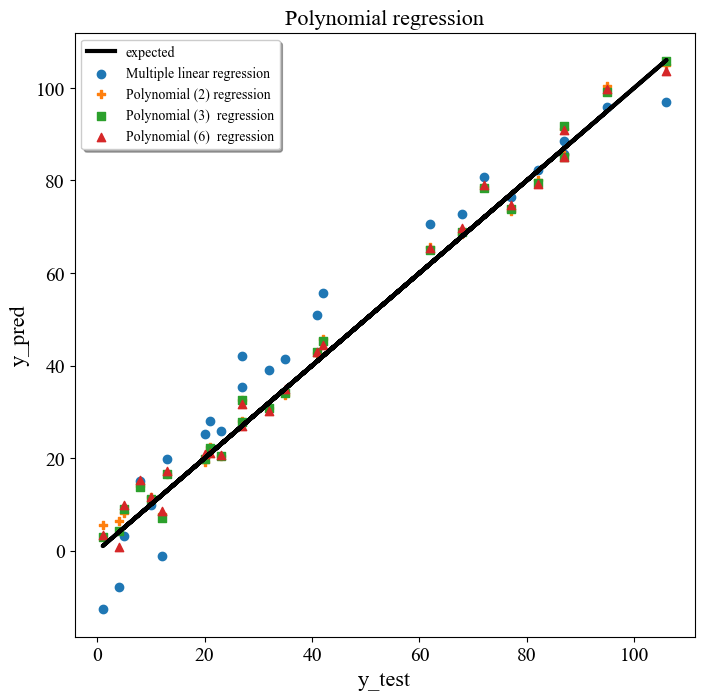

In [15]:
# MLR vs Polynomial
plt.figure(figsize=(8,8), dpi=100)
plt.plot(y_test, y_test, color="black", linewidth=3, label = 'expected')
plt.scatter(y_test, y_pred, marker="o", label = 'Multiple linear regression')
plt.scatter(y_test, y_pred_poly2, marker="P", label = 'Polynomial (2) regression')
plt.scatter(y_test, y_pred_poly3, marker="s", label = 'Polynomial (3)  regression')
plt.scatter(y_test, y_pred_poly6, marker="^", label = 'Polynomial (6)  regression')

plt.title('Polynomial regression', fontdict={'fontname':'Times New Roman', 'fontsize': 16})

#plt.xticks(())
#plt.yticks(())

plt.xlabel('y_test', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.ylabel('y_pred', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')

plt.legend()
plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})

plt.show()

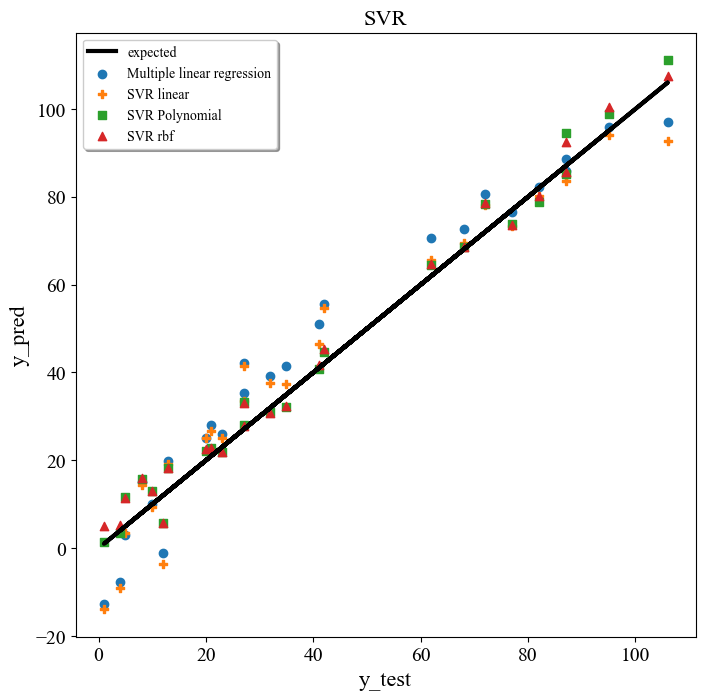

In [16]:
# MLR vs SVR
plt.figure(figsize=(8,8), dpi=100)
plt.plot(y_test, y_test, color="black", linewidth=3, label = 'expected')
plt.scatter(y_test, y_pred, marker="o", label = 'Multiple linear regression')
plt.scatter(y_test, y_pred_svm_lin, marker="P", label = 'SVR linear')
plt.scatter(y_test, y_pred_svm_poly, marker="s", label = 'SVR Polynomial')
plt.scatter(y_test, y_pred_svm_rbf, marker="^", label = 'SVR rbf')

plt.title('SVR', fontdict={'fontname':'Times New Roman', 'fontsize': 16})

#plt.xticks(())
#plt.yticks(())

plt.xlabel('y_test', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.ylabel('y_pred', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')

plt.legend()
plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})

plt.show()

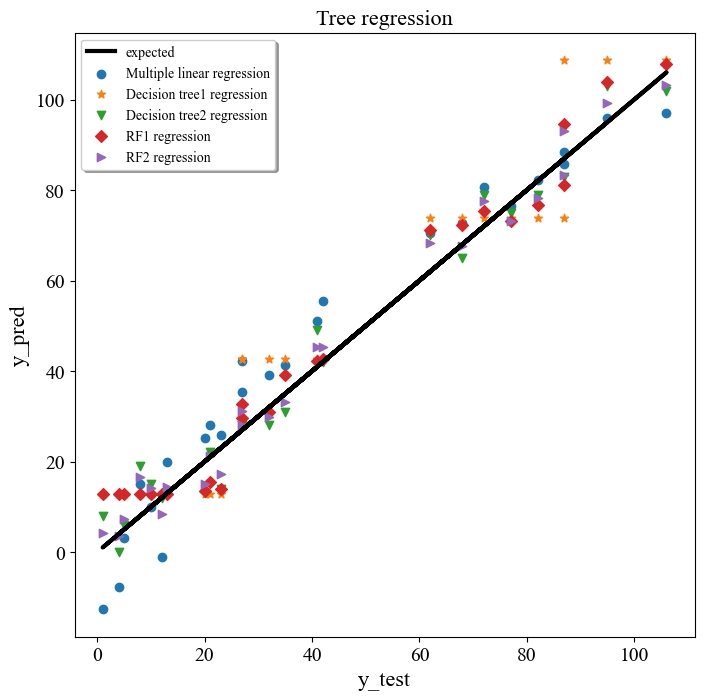

In [17]:
# MLR vs Tree
plt.figure(figsize=(8,8), dpi=100)
plt.plot(y_test, y_test, color="black", linewidth=3, label = 'expected')
plt.scatter(y_test, y_pred, marker="o", label = 'Multiple linear regression')
plt.scatter(y_test, y_pred_dec_tree1, marker="*", label = 'Decision tree1 regression')
plt.scatter(y_test, y_pred_dec_tree2, marker="v", label = 'Decision tree2 regression')
plt.scatter(y_test, y_pred_rf_regr1, marker="D", label = 'RF1 regression')
plt.scatter(y_test, y_pred_rf_regr2, marker=">", label = 'RF2 regression')

plt.title('Tree regression', fontdict={'fontname':'Times New Roman', 'fontsize': 16})

#plt.xticks(())
#plt.yticks(())

plt.xlabel('y_test', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.ylabel('y_pred', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')

plt.legend()
plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})

plt.show()

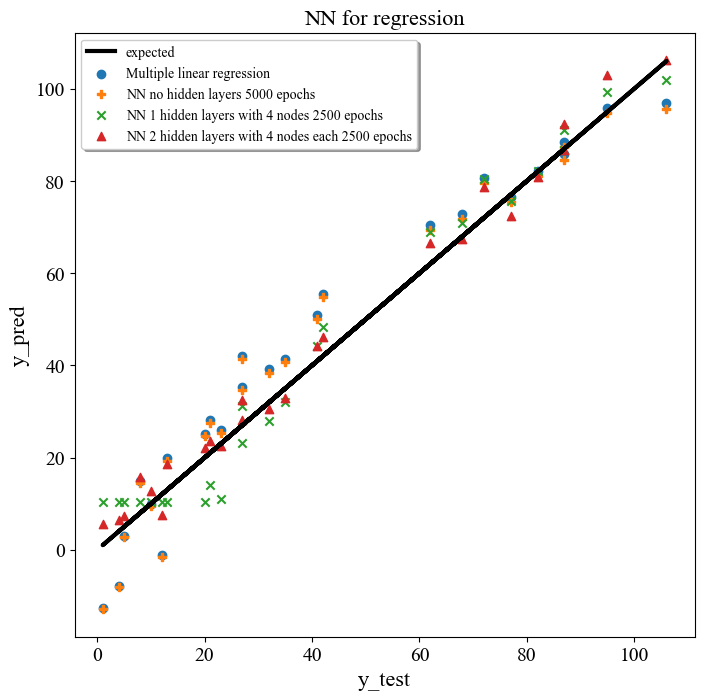

In [18]:
# MLR vs NN
plt.figure(figsize=(8,8), dpi=100)
plt.plot(y_test, y_test, color="black", linewidth=3, label = 'expected')
plt.scatter(y_test, y_pred, marker="o", label = 'Multiple linear regression')
plt.scatter(y_test, y_pred_nn_test, marker="P", label = 'NN no hidden layers 5000 epochs')
plt.scatter(y_test, y_pred_nn2_test, marker="x", label = 'NN 1 hidden layers with 4 nodes 2500 epochs')
plt.scatter(y_test, y_pred_nn3_test, marker="^", label = 'NN 2 hidden layers with 4 nodes each 2500 epochs')
#plt.scatter(y_train, y_pred_nn_train, marker="P", label = 'NN train')

plt.title('NN for regression', fontdict={'fontname':'Times New Roman', 'fontsize': 16})

#plt.xticks(())
#plt.yticks(())

plt.xlabel('y_test', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.ylabel('y_pred', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')

plt.legend()
plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})

plt.show()

After scaling

In [19]:
stdsclr = StandardScaler()
X_sc = stdsclr.fit_transform(X)

In [20]:
X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(X_sc, y, random_state=42)

In [21]:
# Multiple linear regression
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_sc_train, y_sc_train)

# Make predictions using the testing set
y_sc_pred = regr.predict(X_sc_test)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination MLR: %.2f" % r2_score(y_sc_test, y_sc_pred))

# Polynomial regression
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly6 = PolynomialFeatures(6)
X_sc_poly_2 = poly2.fit_transform(X_sc)
X_sc_poly_3 = poly3.fit_transform(X_sc)
X_sc_poly_6 = poly6.fit_transform(X_sc)

X_sc_train_poly2, X_sc_test_poly2, y_sc_train, y_sc_test = train_test_split(X_sc_poly_2, y, random_state=42)
X_sc_train_poly3, X_sc_test_poly3, y_sc_train, y_sc_test = train_test_split(X_sc_poly_3, y, random_state=42)
X_sc_train_poly6, X_sc_test_poly6, y_sc_train, y_sc_test = train_test_split(X_sc_poly_6, y, random_state=42)

polyregr2 = linear_model.LinearRegression()
polyregr3 = linear_model.LinearRegression()
polyregr6 = linear_model.LinearRegression()

# Train the model using the training sets
polyregr2.fit(X_sc_train_poly2, y_sc_train)
polyregr3.fit(X_sc_train_poly3, y_sc_train)
polyregr6.fit(X_sc_train_poly6, y_sc_train)

# Make predictions using the testing set
y_sc_pred_poly2 = polyregr2.predict(X_sc_test_poly2)
y_sc_pred_poly3 = polyregr3.predict(X_sc_test_poly3)
y_sc_pred_poly6 = polyregr6.predict(X_sc_test_poly6)

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination Poly2: %.2f" % r2_score(y_sc_test, y_sc_pred_poly2))
print("Coefficient of determination Poly3: %.2f" % r2_score(y_sc_test, y_sc_pred_poly3))
print("Coefficient of determination Poly6: %.2f" % r2_score(y_sc_test, y_sc_pred_poly6))

# Decision tree regression
decision_tree_regr1 = DecisionTreeRegressor(max_depth=2)
decision_tree_regr1.fit(X_sc_train, y_sc_train)
y_sc_pred_dec_tree1 = decision_tree_regr1.predict(X_sc_test)
print("Coefficient of determination DT1: %.2f" % r2_score(y_sc_test, y_sc_pred_dec_tree1))
decision_tree_regr2 = DecisionTreeRegressor(splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
decision_tree_regr2.fit(X_sc_train, y_sc_train)
y_sc_pred_dec_tree2 = decision_tree_regr2.predict(X_sc_test)
print("Coefficient of determination DT2: %.2f" % r2_score(y_sc_test, y_sc_pred_dec_tree2))

# Random forest regression
rf_regr1 = RandomForestRegressor(max_depth=2, random_state=0)
rf_regr1.fit(X_sc_train, y_sc_train)
y_sc_pred_rf_regr1 = rf_regr1.predict(X_sc_test)
print("Coefficient of determination RF1: %.2f" % r2_score(y_sc_test, y_sc_pred_rf_regr1))
rf_regr2 = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf_regr2.fit(X_sc_train, y_train)
y_sc_pred_rf_regr2 = rf_regr2.predict(X_sc_test)
print("Coefficient of determination RF2: %.2f" % r2_score(y_test, y_pred_rf_regr2))

# SVM regression
svm_lin = SVR(kernel='linear', C=100, gamma="auto")
svm_poly = SVR(kernel='poly', C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svm_lin.fit(X_sc_train, y_train)
svm_poly.fit(X_sc_train, y_train)
svm_rbf.fit(X_sc_train, y_train)

y_sc_pred_svm_lin = svm_lin.predict(X_sc_test)
y_sc_pred_svm_poly = svm_poly.predict(X_sc_test)
y_sc_pred_svm_rbf = svm_rbf.predict(X_sc_test)

print("Coefficient of determination SVR lin: %.2f" % r2_score(y_sc_test, y_sc_pred_svm_lin))
print("Coefficient of determination SVR poly: %.2f" % r2_score(y_sc_test, y_sc_pred_svm_poly))
print("Coefficient of determination SVR rbf: %.2f" % r2_score(y_sc_test, y_sc_pred_svm_rbf))

Coefficient of determination MLR: 0.94
Coefficient of determination Poly2: 0.99
Coefficient of determination Poly3: 0.99
Coefficient of determination Poly6: 0.99
Coefficient of determination DT1: 0.91
Coefficient of determination DT2: 0.97
Coefficient of determination RF1: 0.97
Coefficient of determination RF2: 0.98
Coefficient of determination SVR lin: 0.94
Coefficient of determination SVR poly: 0.99
Coefficient of determination SVR rbf: 0.98


In [22]:
optimizer2 = keras.optimizers.Adam(learning_rate=0.05)
nn4model = Sequential()
nn4model.add(Dense(4, input_dim=2, activation='relu'))
nn4model.add(Dense(4, activation='relu'))
#Output layer
nn4model.add(Dense(1, input_dim=2, activation='linear'))

nn4model.compile(loss='mean_squared_error', optimizer=optimizer2, metrics=['mae'])
nn4model.summary()

history = nn4model.fit(X_sc_train, y_trainfornn, epochs = 2500)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2500
3/3 [==============================] - 0s 3ms/step - loss: 3728.3174 - mae: 48.8196
Epoch 2/2500
3/3 [==============================] - 0s 3ms/step - loss: 3693.6533 - mae: 48.3799
Epoch 3/2500
3/3 [==============================] - 0s 3ms/step - loss: 3651.5950 - mae: 47.7258
Epoch 4/2500
3/3 [=============

3/3 [==============================] - 0s 3ms/step - loss: 25.6683 - mae: 4.1140
Epoch 79/2500
3/3 [==============================] - 0s 3ms/step - loss: 25.3351 - mae: 4.1060
Epoch 80/2500
3/3 [==============================] - 0s 4ms/step - loss: 25.0747 - mae: 4.1147
Epoch 81/2500
3/3 [==============================] - 0s 3ms/step - loss: 25.0817 - mae: 4.1295
Epoch 82/2500
3/3 [==============================] - 0s 2ms/step - loss: 25.0913 - mae: 4.1301
Epoch 83/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.6270 - mae: 4.0988
Epoch 84/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.4166 - mae: 4.0616
Epoch 85/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.3798 - mae: 4.0355
Epoch 86/2500
3/3 [==============================] - 0s 2ms/step - loss: 24.0276 - mae: 4.0209
Epoch 87/2500
3/3 [==============================] - 0s 3ms/step - loss: 24.0127 - mae: 4.0553
Epoch 88/2500
3/3 [==============================] - 0s 2ms/step

3/3 [==============================] - 0s 2ms/step - loss: 16.0794 - mae: 3.3274
Epoch 164/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.6605 - mae: 3.3091
Epoch 165/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.7862 - mae: 3.3348
Epoch 166/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.8081 - mae: 3.3469
Epoch 167/2500
3/3 [==============================] - 0s 1ms/step - loss: 15.4876 - mae: 3.2977
Epoch 168/2500
3/3 [==============================] - 0s 1ms/step - loss: 15.4558 - mae: 3.2978
Epoch 169/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.7261 - mae: 3.3343
Epoch 170/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.2537 - mae: 3.2794
Epoch 171/2500
3/3 [==============================] - 0s 3ms/step - loss: 15.5006 - mae: 3.2955
Epoch 172/2500
3/3 [==============================] - 0s 2ms/step - loss: 15.2743 - mae: 3.2604
Epoch 173/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 13.2299 - mae: 3.0316
Epoch 249/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.4090 - mae: 3.0472
Epoch 250/2500
3/3 [==============================] - 0s 3ms/step - loss: 12.7236 - mae: 2.9666
Epoch 251/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.4641 - mae: 3.0801
Epoch 252/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.4001 - mae: 3.0543
Epoch 253/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.4381 - mae: 3.0211
Epoch 254/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.3904 - mae: 3.0028
Epoch 255/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.9258 - mae: 2.9749
Epoch 256/2500
3/3 [==============================] - 0s 3ms/step - loss: 13.1288 - mae: 2.9989
Epoch 257/2500
3/3 [==============================] - 0s 3ms/step - loss: 12.8721 - mae: 2.9561
Epoch 258/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 12.6670 - mae: 2.9414
Epoch 334/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.8423 - mae: 2.9537
Epoch 335/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.5620 - mae: 2.9546
Epoch 336/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4126 - mae: 2.9415
Epoch 337/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4716 - mae: 2.9235
Epoch 338/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4560 - mae: 2.9054
Epoch 339/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.6201 - mae: 2.9615
Epoch 340/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.3730 - mae: 2.9176
Epoch 341/2500
3/3 [==============================] - 0s 2ms/step - loss: 13.0445 - mae: 2.9992
Epoch 342/2500
3/3 [==============================] - 0s 1ms/step - loss: 12.5418 - mae: 2.8744
Epoch 343/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 12.1978 - mae: 2.8794
Epoch 419/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.1999 - mae: 2.8783
Epoch 420/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.2390 - mae: 2.8775
Epoch 421/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.3253 - mae: 2.8935
Epoch 422/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.0708 - mae: 2.8539
Epoch 423/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.7843 - mae: 2.9397
Epoch 424/2500
3/3 [==============================] - 0s 3ms/step - loss: 12.0600 - mae: 2.8680
Epoch 425/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.3109 - mae: 2.9201
Epoch 426/2500
3/3 [==============================] - 0s 3ms/step - loss: 12.6254 - mae: 2.9649
Epoch 427/2500
3/3 [==============================] - 0s 1ms/step - loss: 12.4286 - mae: 2.9231
Epoch 428/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 1ms/step - loss: 12.3733 - mae: 2.8900
Epoch 504/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4485 - mae: 2.8851
Epoch 505/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4182 - mae: 2.9204
Epoch 506/2500
3/3 [==============================] - 0s 1ms/step - loss: 12.5550 - mae: 2.8855
Epoch 507/2500
3/3 [==============================] - 0s 3ms/step - loss: 12.1492 - mae: 2.8713
Epoch 508/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.2735 - mae: 2.8668
Epoch 509/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.4450 - mae: 2.9144
Epoch 510/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.2107 - mae: 2.8631
Epoch 511/2500
3/3 [==============================] - 0s 3ms/step - loss: 12.1751 - mae: 2.8594
Epoch 512/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.0620 - mae: 2.8310
Epoch 513/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 5ms/step - loss: 12.4073 - mae: 2.8870
Epoch 589/2500
3/3 [==============================] - 0s 1ms/step - loss: 11.8006 - mae: 2.8261
Epoch 590/2500
3/3 [==============================] - 0s 4ms/step - loss: 13.6817 - mae: 3.0537
Epoch 591/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.7030 - mae: 2.7528
Epoch 592/2500
3/3 [==============================] - 0s 4ms/step - loss: 13.7362 - mae: 3.0574
Epoch 593/2500
3/3 [==============================] - 0s 5ms/step - loss: 12.5510 - mae: 2.9005
Epoch 594/2500
3/3 [==============================] - 0s 4ms/step - loss: 12.0150 - mae: 2.8732
Epoch 595/2500
3/3 [==============================] - 0s 2ms/step - loss: 12.1753 - mae: 2.8679
Epoch 596/2500
3/3 [==============================] - 0s 0s/step - loss: 11.7554 - mae: 2.8060
Epoch 597/2500
3/3 [==============================] - 0s 0s/step - loss: 11.9697 - mae: 2.8507
Epoch 598/2500
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 0s/step - loss: 11.3595 - mae: 2.7585
Epoch 674/2500
3/3 [==============================] - 0s 0s/step - loss: 11.3342 - mae: 2.7630
Epoch 675/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.3697 - mae: 2.7520
Epoch 676/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.4166 - mae: 2.7787
Epoch 677/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.5823 - mae: 2.7813
Epoch 678/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.7263 - mae: 2.8226
Epoch 679/2500
3/3 [==============================] - 0s 0s/step - loss: 11.4339 - mae: 2.7819
Epoch 680/2500
3/3 [==============================] - 0s 3ms/step - loss: 11.3525 - mae: 2.7748
Epoch 681/2500
3/3 [==============================] - 0s 3ms/step - loss: 11.7851 - mae: 2.8220
Epoch 682/2500
3/3 [==============================] - 0s 0s/step - loss: 11.4614 - mae: 2.7878
Epoch 683/2500
3/3 [==============================] - 0s 0s

3/3 [==============================] - 0s 4ms/step - loss: 10.9588 - mae: 2.6977
Epoch 759/2500
3/3 [==============================] - 0s 0s/step - loss: 13.0090 - mae: 2.9714
Epoch 760/2500
3/3 [==============================] - 0s 0s/step - loss: 11.2048 - mae: 2.7534
Epoch 761/2500
3/3 [==============================] - 0s 0s/step - loss: 11.5206 - mae: 2.7916
Epoch 762/2500
3/3 [==============================] - 0s 5ms/step - loss: 11.6109 - mae: 2.7767
Epoch 763/2500
3/3 [==============================] - 0s 5ms/step - loss: 11.4132 - mae: 2.8003
Epoch 764/2500
3/3 [==============================] - 0s 5ms/step - loss: 11.3307 - mae: 2.7436
Epoch 765/2500
3/3 [==============================] - 0s 0s/step - loss: 11.2796 - mae: 2.7277
Epoch 766/2500
3/3 [==============================] - 0s 0s/step - loss: 11.4445 - mae: 2.7476
Epoch 767/2500
3/3 [==============================] - 0s 0s/step - loss: 11.6893 - mae: 2.7933
Epoch 768/2500
3/3 [==============================] - 0s 6ms/

3/3 [==============================] - 0s 2ms/step - loss: 11.3024 - mae: 2.7947
Epoch 844/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.2852 - mae: 2.7954
Epoch 845/2500
3/3 [==============================] - 0s 0s/step - loss: 11.4148 - mae: 2.8130
Epoch 846/2500
3/3 [==============================] - 0s 0s/step - loss: 10.9674 - mae: 2.7042
Epoch 847/2500
3/3 [==============================] - 0s 0s/step - loss: 12.5721 - mae: 2.9223
Epoch 848/2500
3/3 [==============================] - 0s 0s/step - loss: 10.7985 - mae: 2.7137
Epoch 849/2500
3/3 [==============================] - 0s 0s/step - loss: 11.4265 - mae: 2.7812
Epoch 850/2500
3/3 [==============================] - 0s 0s/step - loss: 11.0457 - mae: 2.7460
Epoch 851/2500
3/3 [==============================] - 0s 0s/step - loss: 10.4219 - mae: 2.6630
Epoch 852/2500
3/3 [==============================] - 0s 0s/step - loss: 11.9049 - mae: 2.8501
Epoch 853/2500
3/3 [==============================] - 0s 6ms/st

3/3 [==============================] - 0s 4ms/step - loss: 10.2648 - mae: 2.6281
Epoch 930/2500
3/3 [==============================] - 0s 1ms/step - loss: 11.3815 - mae: 2.7604
Epoch 931/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.0486 - mae: 2.6898
Epoch 932/2500
3/3 [==============================] - 0s 0s/step - loss: 10.3332 - mae: 2.6510
Epoch 933/2500
3/3 [==============================] - 0s 4ms/step - loss: 12.5006 - mae: 2.9313
Epoch 934/2500
3/3 [==============================] - 0s 0s/step - loss: 10.5065 - mae: 2.5987
Epoch 935/2500
3/3 [==============================] - 0s 8ms/step - loss: 12.7717 - mae: 2.9850
Epoch 936/2500
3/3 [==============================] - 0s 0s/step - loss: 13.3732 - mae: 3.0242
Epoch 937/2500
3/3 [==============================] - 0s 738us/step - loss: 10.6694 - mae: 2.7040
Epoch 938/2500
3/3 [==============================] - 0s 3ms/step - loss: 14.0872 - mae: 3.1258
Epoch 939/2500
3/3 [==============================] - 0s

3/3 [==============================] - 0s 3ms/step - loss: 10.5769 - mae: 2.6726
Epoch 1015/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.1406 - mae: 2.7611
Epoch 1016/2500
3/3 [==============================] - 0s 5ms/step - loss: 10.0614 - mae: 2.6614
Epoch 1017/2500
3/3 [==============================] - 0s 4ms/step - loss: 12.3881 - mae: 2.9176
Epoch 1018/2500
3/3 [==============================] - 0s 0s/step - loss: 10.6173 - mae: 2.7236
Epoch 1019/2500
3/3 [==============================] - 0s 0s/step - loss: 10.5661 - mae: 2.7404
Epoch 1020/2500
3/3 [==============================] - 0s 0s/step - loss: 10.5004 - mae: 2.6902
Epoch 1021/2500
3/3 [==============================] - 0s 0s/step - loss: 9.9606 - mae: 2.6359
Epoch 1022/2500
3/3 [==============================] - 0s 0s/step - loss: 10.6819 - mae: 2.7136
Epoch 1023/2500
3/3 [==============================] - 0s 7ms/step - loss: 10.1341 - mae: 2.6515
Epoch 1024/2500
3/3 [==============================]

3/3 [==============================] - 0s 0s/step - loss: 11.2066 - mae: 2.8313
Epoch 1100/2500
3/3 [==============================] - 0s 0s/step - loss: 10.6645 - mae: 2.7063
Epoch 1101/2500
3/3 [==============================] - 0s 0s/step - loss: 10.4892 - mae: 2.6562
Epoch 1102/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2063 - mae: 2.6204
Epoch 1103/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.3602 - mae: 2.6562
Epoch 1104/2500
3/3 [==============================] - 0s 0s/step - loss: 10.1891 - mae: 2.5982
Epoch 1105/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2236 - mae: 2.6261
Epoch 1106/2500
3/3 [==============================] - 0s 0s/step - loss: 10.4685 - mae: 2.6765
Epoch 1107/2500
3/3 [==============================] - 0s 0s/step - loss: 10.3977 - mae: 2.6828
Epoch 1108/2500
3/3 [==============================] - 0s 0s/step - loss: 10.4807 - mae: 2.6950
Epoch 1109/2500
3/3 [==============================] - 

3/3 [==============================] - 0s 0s/step - loss: 10.7461 - mae: 2.7082
Epoch 1185/2500
3/3 [==============================] - 0s 0s/step - loss: 11.3563 - mae: 2.7850
Epoch 1186/2500
3/3 [==============================] - 0s 0s/step - loss: 9.9544 - mae: 2.5787
Epoch 1187/2500
3/3 [==============================] - 0s 0s/step - loss: 11.9029 - mae: 2.9064
Epoch 1188/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.2719 - mae: 2.8135
Epoch 1189/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.0669 - mae: 2.7166
Epoch 1190/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.5032 - mae: 2.6974
Epoch 1191/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.5477 - mae: 2.6982
Epoch 1192/2500
3/3 [==============================] - 0s 0s/step - loss: 10.3951 - mae: 2.6389
Epoch 1193/2500
3/3 [==============================] - 0s 0s/step - loss: 10.1654 - mae: 2.6423
Epoch 1194/2500
3/3 [==============================] 

3/3 [==============================] - 0s 4ms/step - loss: 11.3718 - mae: 2.7845
Epoch 1270/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.4377 - mae: 2.6703
Epoch 1271/2500
3/3 [==============================] - 0s 0s/step - loss: 11.6558 - mae: 2.8928
Epoch 1272/2500
3/3 [==============================] - 0s 0s/step - loss: 10.9022 - mae: 2.6800
Epoch 1273/2500
3/3 [==============================] - 0s 0s/step - loss: 11.8680 - mae: 2.8651
Epoch 1274/2500
3/3 [==============================] - 0s 0s/step - loss: 10.5632 - mae: 2.6896
Epoch 1275/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2909 - mae: 2.6557
Epoch 1276/2500
3/3 [==============================] - 0s 0s/step - loss: 11.1784 - mae: 2.7645
Epoch 1277/2500
3/3 [==============================] - 0s 0s/step - loss: 10.6343 - mae: 2.7071
Epoch 1278/2500
3/3 [==============================] - 0s 0s/step - loss: 10.0360 - mae: 2.6321
Epoch 1279/2500
3/3 [==============================] -

3/3 [==============================] - 0s 4ms/step - loss: 11.0243 - mae: 2.8340
Epoch 1355/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.7340 - mae: 2.7215
Epoch 1356/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.9879 - mae: 2.6667
Epoch 1357/2500
3/3 [==============================] - 0s 1ms/step - loss: 11.4265 - mae: 2.8484
Epoch 1358/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.0744 - mae: 2.6336
Epoch 1359/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.8716 - mae: 2.7433
Epoch 1360/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.7736 - mae: 2.6217
Epoch 1361/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.8968 - mae: 2.6661
Epoch 1362/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.9903 - mae: 2.6675
Epoch 1363/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.8021 - mae: 2.6370
Epoch 1364/2500
3/3 [==============================

3/3 [==============================] - 0s 0s/step - loss: 17.1398 - mae: 3.3675
Epoch 1440/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.3920 - mae: 2.8253
Epoch 1441/2500
3/3 [==============================] - 0s 4ms/step - loss: 19.0612 - mae: 3.6453
Epoch 1442/2500
3/3 [==============================] - 0s 6ms/step - loss: 16.6625 - mae: 3.3325
Epoch 1443/2500
3/3 [==============================] - 0s 2ms/step - loss: 11.2791 - mae: 2.8000
Epoch 1444/2500
3/3 [==============================] - 0s 997us/step - loss: 18.1570 - mae: 3.6053
Epoch 1445/2500
3/3 [==============================] - 0s 5ms/step - loss: 11.9039 - mae: 3.0120
Epoch 1446/2500
3/3 [==============================] - 0s 4ms/step - loss: 13.6105 - mae: 3.1611
Epoch 1447/2500
3/3 [==============================] - 0s 0s/step - loss: 14.8399 - mae: 3.2016
Epoch 1448/2500
3/3 [==============================] - 0s 0s/step - loss: 12.5141 - mae: 3.0123
Epoch 1449/2500
3/3 [==========================

3/3 [==============================] - 0s 0s/step - loss: 9.6971 - mae: 2.6168
Epoch 1525/2500
3/3 [==============================] - 0s 3ms/step - loss: 10.7555 - mae: 2.7100
Epoch 1526/2500
3/3 [==============================] - 0s 0s/step - loss: 10.1328 - mae: 2.6236
Epoch 1527/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.6905 - mae: 2.7923
Epoch 1528/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.9353 - mae: 2.7984
Epoch 1529/2500
3/3 [==============================] - 0s 0s/step - loss: 9.6663 - mae: 2.7006
Epoch 1530/2500
3/3 [==============================] - 0s 0s/step - loss: 11.7404 - mae: 2.9201
Epoch 1531/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2203 - mae: 2.6504
Epoch 1532/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2109 - mae: 2.6783
Epoch 1533/2500
3/3 [==============================] - 0s 0s/step - loss: 10.0895 - mae: 2.7161
Epoch 1534/2500
3/3 [==============================] - 

3/3 [==============================] - 0s 4ms/step - loss: 10.0896 - mae: 2.6677
Epoch 1610/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.9277 - mae: 2.6436
Epoch 1611/2500
3/3 [==============================] - 0s 5ms/step - loss: 10.1647 - mae: 2.6494
Epoch 1612/2500
3/3 [==============================] - 0s 5ms/step - loss: 10.3069 - mae: 2.6561
Epoch 1613/2500
3/3 [==============================] - 0s 5ms/step - loss: 10.0279 - mae: 2.6840
Epoch 1614/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.8822 - mae: 2.6720
Epoch 1615/2500
3/3 [==============================] - 0s 0s/step - loss: 9.5930 - mae: 2.6642
Epoch 1616/2500
3/3 [==============================] - 0s 0s/step - loss: 9.6849 - mae: 2.6311
Epoch 1617/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.6958 - mae: 2.6433
Epoch 1618/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.8346 - mae: 2.6501
Epoch 1619/2500
3/3 [==============================] -

3/3 [==============================] - 0s 4ms/step - loss: 10.3330 - mae: 2.6464
Epoch 1695/2500
3/3 [==============================] - 0s 758us/step - loss: 9.4974 - mae: 2.5750
Epoch 1696/2500
3/3 [==============================] - 0s 5ms/step - loss: 10.4492 - mae: 2.7506
Epoch 1697/2500
3/3 [==============================] - 0s 5ms/step - loss: 9.8536 - mae: 2.6636
Epoch 1698/2500
3/3 [==============================] - 0s 1ms/step - loss: 10.7809 - mae: 2.7209
Epoch 1699/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.9494 - mae: 2.6690
Epoch 1700/2500
3/3 [==============================] - 0s 0s/step - loss: 11.6171 - mae: 2.9249
Epoch 1701/2500
3/3 [==============================] - 0s 0s/step - loss: 12.4650 - mae: 2.9152
Epoch 1702/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2445 - mae: 2.7128
Epoch 1703/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.2993 - mae: 2.7320
Epoch 1704/2500
3/3 [=============================

3/3 [==============================] - 0s 4ms/step - loss: 9.5513 - mae: 2.5130
Epoch 1780/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.4424 - mae: 2.7742
Epoch 1781/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.3930 - mae: 2.7502
Epoch 1782/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.5671 - mae: 2.6129
Epoch 1783/2500
3/3 [==============================] - 0s 5ms/step - loss: 10.3697 - mae: 2.6704
Epoch 1784/2500
3/3 [==============================] - 0s 0s/step - loss: 10.0801 - mae: 2.7331
Epoch 1785/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.3476 - mae: 2.8710
Epoch 1786/2500
3/3 [==============================] - 0s 0s/step - loss: 11.6705 - mae: 2.7526
Epoch 1787/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.9354 - mae: 2.7770
Epoch 1788/2500
3/3 [==============================] - 0s 4ms/step - loss: 12.2999 - mae: 2.9361
Epoch 1789/2500
3/3 [=============================

3/3 [==============================] - 0s 0s/step - loss: 10.5354 - mae: 2.7727
Epoch 1865/2500
3/3 [==============================] - 0s 0s/step - loss: 9.9955 - mae: 2.6428
Epoch 1866/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.5057 - mae: 2.6854
Epoch 1867/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.1977 - mae: 2.8631
Epoch 1868/2500
3/3 [==============================] - 0s 0s/step - loss: 9.7156 - mae: 2.6451
Epoch 1869/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.2739 - mae: 2.6664
Epoch 1870/2500
3/3 [==============================] - 0s 2ms/step - loss: 9.4467 - mae: 2.5675
Epoch 1871/2500
3/3 [==============================] - 0s 0s/step - loss: 9.5162 - mae: 2.5821
Epoch 1872/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.8343 - mae: 2.6214
Epoch 1873/2500
3/3 [==============================] - 0s 0s/step - loss: 9.7036 - mae: 2.5870
Epoch 1874/2500
3/3 [==============================] - 0s

3/3 [==============================] - 0s 4ms/step - loss: 9.8251 - mae: 2.6713
Epoch 1950/2500
3/3 [==============================] - 0s 7ms/step - loss: 9.8386 - mae: 2.5896
Epoch 1951/2500
3/3 [==============================] - 0s 0s/step - loss: 9.7218 - mae: 2.6301
Epoch 1952/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.7930 - mae: 2.6310
Epoch 1953/2500
3/3 [==============================] - 0s 0s/step - loss: 9.6149 - mae: 2.5796
Epoch 1954/2500
3/3 [==============================] - 0s 0s/step - loss: 9.4671 - mae: 2.5889
Epoch 1955/2500
3/3 [==============================] - 0s 0s/step - loss: 10.0432 - mae: 2.7133
Epoch 1956/2500
3/3 [==============================] - 0s 3ms/step - loss: 11.0778 - mae: 2.7924
Epoch 1957/2500
3/3 [==============================] - 0s 3ms/step - loss: 11.2273 - mae: 2.7409
Epoch 1958/2500
3/3 [==============================] - 0s 0s/step - loss: 10.9844 - mae: 2.7526
Epoch 1959/2500
3/3 [==============================] - 0s

3/3 [==============================] - 0s 0s/step - loss: 10.5529 - mae: 2.7978
Epoch 2035/2500
3/3 [==============================] - 0s 503us/step - loss: 10.1605 - mae: 2.6991
Epoch 2036/2500
3/3 [==============================] - 0s 0s/step - loss: 9.3572 - mae: 2.5674
Epoch 2037/2500
3/3 [==============================] - 0s 0s/step - loss: 9.8157 - mae: 2.6648
Epoch 2038/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.6745 - mae: 2.6213
Epoch 2039/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.4658 - mae: 2.6090
Epoch 2040/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.5935 - mae: 2.6379
Epoch 2041/2500
3/3 [==============================] - 0s 0s/step - loss: 9.8776 - mae: 2.6168
Epoch 2042/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.8018 - mae: 2.6600
Epoch 2043/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.9392 - mae: 2.6833
Epoch 2044/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 5ms/step - loss: 13.1447 - mae: 3.0248
Epoch 2120/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.5391 - mae: 2.7600
Epoch 2121/2500
3/3 [==============================] - 0s 0s/step - loss: 9.9719 - mae: 2.6737
Epoch 2122/2500
3/3 [==============================] - 0s 0s/step - loss: 9.8817 - mae: 2.6381
Epoch 2123/2500
3/3 [==============================] - 0s 0s/step - loss: 9.6658 - mae: 2.5945
Epoch 2124/2500
3/3 [==============================] - 0s 0s/step - loss: 9.8873 - mae: 2.6626
Epoch 2125/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.1280 - mae: 2.7680
Epoch 2126/2500
3/3 [==============================] - 0s 0s/step - loss: 10.4148 - mae: 2.7181
Epoch 2127/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.8654 - mae: 2.8118
Epoch 2128/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.5169 - mae: 2.5539
Epoch 2129/2500
3/3 [==============================] - 0

3/3 [==============================] - 0s 759us/step - loss: 10.9529 - mae: 2.8583
Epoch 2205/2500
3/3 [==============================] - 0s 5ms/step - loss: 11.8675 - mae: 2.7880
Epoch 2206/2500
3/3 [==============================] - 0s 0s/step - loss: 10.6549 - mae: 2.6213
Epoch 2207/2500
3/3 [==============================] - 0s 0s/step - loss: 12.2009 - mae: 2.9398
Epoch 2208/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.1287 - mae: 2.7608
Epoch 2209/2500
3/3 [==============================] - 0s 4ms/step - loss: 11.4662 - mae: 2.7487
Epoch 2210/2500
3/3 [==============================] - 0s 4ms/step - loss: 12.2547 - mae: 2.9450
Epoch 2211/2500
3/3 [==============================] - 0s 0s/step - loss: 10.4288 - mae: 2.7095
Epoch 2212/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.7786 - mae: 2.5797
Epoch 2213/2500
3/3 [==============================] - 0s 6ms/step - loss: 9.9898 - mae: 2.6998
Epoch 2214/2500
3/3 [============================

3/3 [==============================] - 0s 8ms/step - loss: 9.4602 - mae: 2.5903
Epoch 2290/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.6932 - mae: 2.6095
Epoch 2291/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.5530 - mae: 2.5915
Epoch 2292/2500
3/3 [==============================] - 0s 0s/step - loss: 10.1175 - mae: 2.6498
Epoch 2293/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.6472 - mae: 2.5885
Epoch 2294/2500
3/3 [==============================] - 0s 6ms/step - loss: 9.7851 - mae: 2.6489
Epoch 2295/2500
3/3 [==============================] - 0s 0s/step - loss: 10.7825 - mae: 2.7853
Epoch 2296/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.0515 - mae: 2.6323
Epoch 2297/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2349 - mae: 2.7042
Epoch 2298/2500
3/3 [==============================] - 0s 0s/step - loss: 10.1024 - mae: 2.6170
Epoch 2299/2500
3/3 [==============================] - 

3/3 [==============================] - 0s 4ms/step - loss: 10.7116 - mae: 2.6989
Epoch 2375/2500
3/3 [==============================] - 0s 5ms/step - loss: 9.6212 - mae: 2.5956
Epoch 2376/2500
3/3 [==============================] - 0s 0s/step - loss: 10.0685 - mae: 2.6851
Epoch 2377/2500
3/3 [==============================] - 0s 0s/step - loss: 10.8834 - mae: 2.7301
Epoch 2378/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.4034 - mae: 2.7784
Epoch 2379/2500
3/3 [==============================] - 0s 0s/step - loss: 9.9790 - mae: 2.7136
Epoch 2380/2500
3/3 [==============================] - 0s 0s/step - loss: 10.6734 - mae: 2.6740
Epoch 2381/2500
3/3 [==============================] - 0s 4ms/step - loss: 10.2233 - mae: 2.6997
Epoch 2382/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.6511 - mae: 2.5479
Epoch 2383/2500
3/3 [==============================] - 0s 0s/step - loss: 10.2926 - mae: 2.6552
Epoch 2384/2500
3/3 [==============================] -

3/3 [==============================] - 0s 5ms/step - loss: 9.7974 - mae: 2.6785
Epoch 2460/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.7052 - mae: 2.6357
Epoch 2461/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.7029 - mae: 2.5998
Epoch 2462/2500
3/3 [==============================] - 0s 0s/step - loss: 9.6486 - mae: 2.6743
Epoch 2463/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.9010 - mae: 2.6888
Epoch 2464/2500
3/3 [==============================] - 0s 0s/step - loss: 9.5037 - mae: 2.5882
Epoch 2465/2500
3/3 [==============================] - 0s 0s/step - loss: 9.9474 - mae: 2.6892
Epoch 2466/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.1732 - mae: 2.5847
Epoch 2467/2500
3/3 [==============================] - 0s 0s/step - loss: 10.3714 - mae: 2.6150
Epoch 2468/2500
3/3 [==============================] - 0s 4ms/step - loss: 9.7761 - mae: 2.6673
Epoch 2469/2500
3/3 [==============================] - 0s 4

# Classification

Initializing data

In [23]:
X, y = spiral_data(100,3)

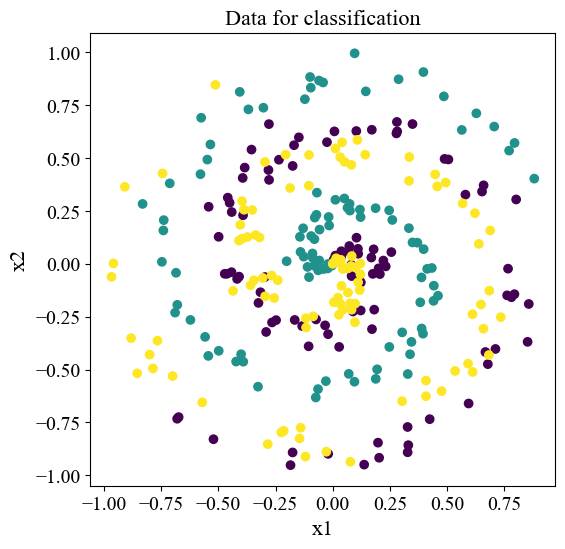

In [24]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(x = X[:,0], y = X[:,1], c = y)

plt.title('Data for classification', fontdict={'fontname':'Times New Roman', 'fontsize': 16})

#plt.xticks(())
#plt.yticks(())

plt.xlabel('x1', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.ylabel('x2', fontdict={'fontname':'Times New Roman', 'fontsize': 16})
plt.xticks(fontsize= 14, fontname = 'Times New Roman')
plt.yticks(fontsize= 14, fontname = 'Times New Roman')

#plt.legend()
#plt.legend(loc='best', shadow = True, fontsize= 10, prop={'family': 'Times New Roman'})

plt.show()

Data preprocessing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
stdsclr = StandardScaler()
X_scaled = stdsclr.fit_transform(X)
X_train_scaled = stdsclr.transform(X_train)
X_test_scaled = stdsclr.transform(X_test)

In [27]:
# Logistic Regression

In [29]:
LRdefault = LogisticRegression()
LRdefault.fit(X_train_scaled, y_train)
predLRdefault = LRdefault.predict(X_scaled)
print(classification_report(predLRdefault, y)) 

              precision    recall  f1-score   support

           0       0.17      0.35      0.23        48
           1       0.67      0.42      0.51       161
           2       0.40      0.44      0.42        91

    accuracy                           0.41       300
   macro avg       0.41      0.40      0.39       300
weighted avg       0.51      0.41      0.44       300



In [30]:
param_grid1 = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

In [31]:
LRoptimized = LogisticRegression()
clfLRoptimized = GridSearchCV(LRoptimized, param_grid = param_grid1, cv = 3, verbose=True, n_jobs=-1)
best_clfLRoptimized = clfLRoptimized.fit(X_train_scaled, y_train)
predLRoptimized = best_clfLRoptimized.predict(X_scaled)
print(classification_report(predLRoptimized, y)) 

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
              precision    recall  f1-score   support

           0       0.17      0.38      0.23        45
           1       0.67      0.41      0.51       165
           2       0.39      0.43      0.41        90

    accuracy                           0.41       300
   macro avg       0.41      0.41      0.38       300
weighted avg       0.51      0.41      0.44       300



In [ ]:
# Naive Bayes

In [32]:
NB = GaussianNB()
NB.fit(X_train_scaled, y_train)
predNB = NB.predict(X_scaled)
print(classification_report(predNB, y)) 

              precision    recall  f1-score   support

           0       0.28      0.38      0.32        74
           1       0.64      0.43      0.51       150
           2       0.27      0.36      0.31        76

    accuracy                           0.40       300
   macro avg       0.40      0.39      0.38       300
weighted avg       0.46      0.40      0.41       300



In [33]:
param_grid2 = [    
    {'var_smoothing' : [1e-09, 9e-08, 1.5e-9, 5e-9]
    }
]

In [34]:
NBoptimized = GaussianNB()
clfNBoptimized = GridSearchCV(NBoptimized, param_grid = param_grid2, cv = 3, verbose=True, n_jobs=-1)
best_clfNBoptimized = clfNBoptimized.fit(X_train_scaled, y_train)
predNBoptimized = best_clfNBoptimized.predict(X_scaled)
print(classification_report(predNBoptimized, y)) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
              precision    recall  f1-score   support

           0       0.28      0.38      0.32        74
           1       0.64      0.43      0.51       150
           2       0.27      0.36      0.31        76

    accuracy                           0.40       300
   macro avg       0.40      0.39      0.38       300
weighted avg       0.46      0.40      0.41       300



In [35]:
# Random Forest Classifier

In [36]:
# Number of trees in random forest
n_estimators = [10, 20, 50, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 5, 10, 20, 50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid3 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
RFC = RandomForestClassifier()
RFC.fit(X_train_scaled, y_train)
predRFC = RFC.predict(X_scaled)
print(classification_report(predRFC, y)) 

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        97
           1       0.98      0.95      0.97       103
           2       0.92      0.92      0.92       100

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [39]:
RFCoptimized = RandomForestClassifier()
clfRFCoptimized = GridSearchCV(RFCoptimized, param_grid = param_grid3, cv = 3, verbose=True, n_jobs=-1)
best_clfRFCoptimized = clfRFCoptimized.fit(X_train_scaled, y_train)
predRFCoptimized = best_clfRFCoptimized.predict(X_scaled)
print(classification_report(predRFCoptimized, y)) 

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       100
           1       0.95      0.99      0.97        96
           2       0.96      0.92      0.94       104

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [40]:
# SVC

In [41]:
param_grid4 = {'C': [0.1,1, 10, 100, 150, 200], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [42]:
SV = SVC()
SV.fit(X_train_scaled, y_train)
predSV = SV.predict(X_scaled)
print(classification_report(predSV, y)) 

              precision    recall  f1-score   support

           0       0.41      0.37      0.39       111
           1       0.65      0.44      0.52       149
           2       0.22      0.55      0.31        40

    accuracy                           0.43       300
   macro avg       0.43      0.45      0.41       300
weighted avg       0.50      0.43      0.45       300



In [44]:
SVoptimized = SVC()
clfSVoptimized = GridSearchCV(SVoptimized, param_grid = param_grid4, cv = 3, verbose=True, n_jobs=-1)
best_clfSVoptimized = clfSVoptimized.fit(X_train_scaled, y_train)
predSVoptimized = best_clfSVoptimized.predict(X_scaled)
print(classification_report(predSVoptimized, y)) 

Fitting 3 folds for each of 72 candidates, totalling 216 fits
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.96      0.98      0.97        98
           2       0.77      0.83      0.80        93

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [45]:
#clfSVoptimized.best_params_

In [46]:
# KNN

In [49]:
KNC = KNeighborsClassifier()
KNC.fit(X_train_scaled, y_train)
predKNC = KNC.predict(X_scaled)
print(classification_report(predKNC, y)) 

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        95
           1       0.97      0.94      0.96       103
           2       0.73      0.72      0.72       102

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [47]:
param_grid5 = { 'n_neighbors' : [5,7,9,11,13,15,20,30],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [48]:
KNCoptimized = KNeighborsClassifier()
clfKNCoptimized = GridSearchCV(KNCoptimized, param_grid = param_grid5, cv = 3, verbose=True, n_jobs=-1)
best_clfKNCoptimized = clfKNCoptimized.fit(X_train_scaled, y_train)
predKNCoptimized = best_clfKNCoptimized.predict(X_scaled)
print(classification_report(predKNCoptimized, y)) 

Fitting 3 folds for each of 48 candidates, totalling 144 fits
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.99      0.98      0.99       101
           2       0.91      0.92      0.91        99

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
# NN

In [50]:
optimizer2 = keras.optimizers.Adam(learning_rate=0.02)
nn5model = Sequential()
nn5model.add(Dense(2, input_shape=(2,), activation='relu'))
nn5model.add(Dense(8, activation='relu'))
#nn5model.add(Dense(4, activation='relu'))
#nn5model.add(Dense(4, activation='relu'))
#Output layer
nn5model.add(Dense(3, activation='softmax'))

nn5model.compile(optimizer=optimizer2, loss='sparse_categorical_crossentropy', metrics =['accuracy'])
nn5model.summary()

history = nn5model.fit(X, y, epochs = 500)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 8)                 24        
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 5ms/step - loss: 1.1028 - accuracy: 0.3233
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.3667
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.3467
Epoch 4/500
10/10 [======

10/10 [==============================] - 0s 2ms/step - loss: 1.0834 - accuracy: 0.3933
Epoch 75/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0861 - accuracy: 0.3900
Epoch 76/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0809 - accuracy: 0.3967
Epoch 77/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0831 - accuracy: 0.3967
Epoch 78/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0818 - accuracy: 0.3900
Epoch 79/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0840 - accuracy: 0.4033
Epoch 80/500
10/10 [==============================] - 0s 3ms/step - loss: 1.0806 - accuracy: 0.3967
Epoch 81/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0828 - accuracy: 0.3833
Epoch 82/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0819 - accuracy: 0.3900
Epoch 83/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0832 - accuracy: 0.3900
Epoch 84/500


10/10 [==============================] - 0s 3ms/step - loss: 1.0809 - accuracy: 0.3900
Epoch 156/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0819 - accuracy: 0.3967
Epoch 157/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0829 - accuracy: 0.3900
Epoch 158/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0815 - accuracy: 0.3933
Epoch 159/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0820 - accuracy: 0.4000
Epoch 160/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0824 - accuracy: 0.4100
Epoch 161/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0848 - accuracy: 0.3933
Epoch 162/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0812 - accuracy: 0.3967
Epoch 163/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0809 - accuracy: 0.3800
Epoch 164/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0863 - accuracy: 0.3933
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 1.0816 - accuracy: 0.3867
Epoch 237/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0826 - accuracy: 0.3900
Epoch 238/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0818 - accuracy: 0.3900
Epoch 239/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0810 - accuracy: 0.3933
Epoch 240/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0814 - accuracy: 0.3967
Epoch 241/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0826 - accuracy: 0.3900
Epoch 242/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0808 - accuracy: 0.3967
Epoch 243/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0836 - accuracy: 0.4000
Epoch 244/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0824 - accuracy: 0.4000
Epoch 245/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0830 - accuracy: 0.3900
Epoc

10/10 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.4000
Epoch 318/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0826 - accuracy: 0.4000
Epoch 319/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0814 - accuracy: 0.3900
Epoch 320/500
10/10 [==============================] - 0s 3ms/step - loss: 1.0824 - accuracy: 0.3900
Epoch 321/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.3900
Epoch 322/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0817 - accuracy: 0.3900
Epoch 323/500
10/10 [==============================] - 0s 3ms/step - loss: 1.0839 - accuracy: 0.3933
Epoch 324/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0817 - accuracy: 0.3833
Epoch 325/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0816 - accuracy: 0.3933
Epoch 326/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0817 - accuracy: 0.3800
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 1.0811 - accuracy: 0.3933
Epoch 399/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0865 - accuracy: 0.3900
Epoch 400/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.4000
Epoch 401/500
10/10 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.3967
Epoch 402/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0818 - accuracy: 0.3900
Epoch 403/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0818 - accuracy: 0.3933
Epoch 404/500
10/10 [==============================] - 0s 890us/step - loss: 1.0815 - accuracy: 0.3833
Epoch 405/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0821 - accuracy: 0.4000
Epoch 406/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0816 - accuracy: 0.3833
Epoch 407/500
10/10 [==============================] - 0s 3ms/step - loss: 1.0820 - accuracy: 0.3933
Ep

10/10 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.3933
Epoch 480/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0828 - accuracy: 0.4000
Epoch 481/500
10/10 [==============================] - 0s 889us/step - loss: 1.0815 - accuracy: 0.3933
Epoch 482/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0817 - accuracy: 0.3933
Epoch 483/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0820 - accuracy: 0.3900
Epoch 484/500
10/10 [==============================] - 0s 1ms/step - loss: 1.0812 - accuracy: 0.4000
Epoch 485/500
10/10 [==============================] - 0s 889us/step - loss: 1.0817 - accuracy: 0.4000
Epoch 486/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0829 - accuracy: 0.3800
Epoch 487/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0841 - accuracy: 0.3900
Epoch 488/500
10/10 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.3967


In [52]:
y_pred_nn5 = nn5model.predict(X)
#y_pred_nn5
y_pred_nn5 = np.argmax(y_pred_nn5, axis=1)
print("Classification report:" , classification_report(y, y_pred_nn5))

10/10 [==============================] - 0s 2ms/step
Classification report:               precision    recall  f1-score   support

           0       0.32      0.07      0.11       100
           1       0.40      0.53      0.46       100
           2       0.39      0.58      0.47       100

    accuracy                           0.39       300
   macro avg       0.37      0.39      0.35       300
weighted avg       0.37      0.39      0.35       300



Result comparison

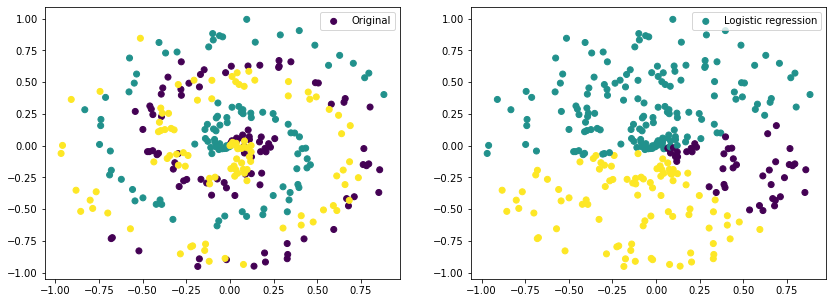

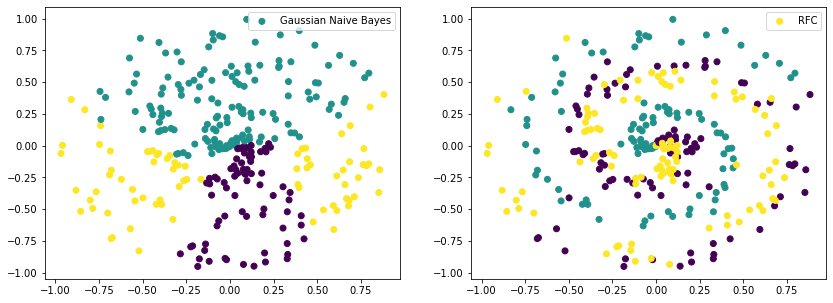

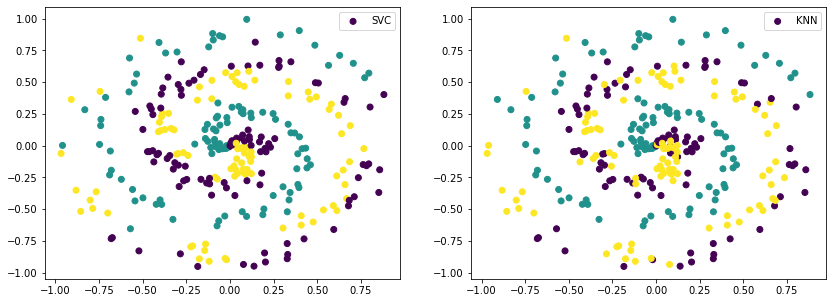

In [53]:
fig1, (ax11, ax12) = plt.subplots(ncols=2, figsize=(14, 5))
fig2, (ax21, ax22) = plt.subplots(ncols=2, figsize=(14, 5))
fig3, (ax31, ax32) = plt.subplots(ncols=2, figsize=(14, 5))

ax11.scatter(X[:,0], X[:,1], label = 'Original', c = y)
ax12.scatter(X[:,0], X[:,1], label = 'Logistic regression', c = predLRoptimized)
ax21.scatter(X[:,0], X[:,1], label = 'Gaussian Naive Bayes', c = predNBoptimized)
ax22.scatter(X[:,0], X[:,1], label = 'RFC', c = predRFCoptimized)
ax31.scatter(X[:,0], X[:,1], label = 'SVC', c = predSVoptimized)
ax32.scatter(X[:,0], X[:,1], label = 'KNN', c = predKNCoptimized)

ax11.legend()
ax12.legend()
ax21.legend()
ax22.legend()
ax31.legend()
ax32.legend()

plt.show()

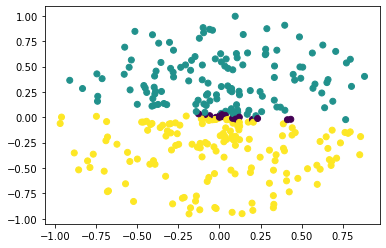

In [54]:
plt.scatter(X[:,0], X[:,1], label = 'NN', c = y_pred_nn5)
plt.show()

With added higher order features!

In [55]:
#x1^2, x2^2, x1*x2, sinx1, sinx2
x1square = X[:,0]*X[:,0]
x2square = X[:,1]*X[:,1]
x1x2 = X[:,0]*X[:,1]
sinx1 = np.sin(X[:,0])
sinx2 = np.sin(X[:,1])

X_withaddedfeatures = np.vstack((X[:,0],X[:,1], x1square, x2square, x1x2, sinx1, sinx2))
X_withaddedfeatures = X_withaddedfeatures.transpose()
X_withaddedfeatures.shape

(300, 7)

In [56]:
Xwithextrafeatures_train, Xwithextrafeatures_test, y_train, y_test = train_test_split(X_withaddedfeatures, y, test_size=0.2, random_state=42)
stdsclr = StandardScaler()
Xwithextrafeatures_scaled = stdsclr.fit_transform(X_withaddedfeatures)
Xwithextrafeatures_train_scaled = stdsclr.transform(Xwithextrafeatures_train)
Xwithextrafeatures_test_scaled = stdsclr.transform(Xwithextrafeatures_test)

In [57]:
model111 = LogisticRegression()
model111.fit(Xwithextrafeatures_train_scaled, y_train)
pred111 = model111.predict(Xwithextrafeatures_scaled)
print(classification_report(pred111, y)) 

              precision    recall  f1-score   support

           0       0.30      0.40      0.34        75
           1       0.62      0.42      0.50       147
           2       0.27      0.35      0.30        78

    accuracy                           0.40       300
   macro avg       0.40      0.39      0.38       300
weighted avg       0.45      0.40      0.41       300



In [58]:
model112 = GaussianNB()
model112.fit(Xwithextrafeatures_train_scaled, y_train)
pred112 = model112.predict(Xwithextrafeatures_scaled)
print(classification_report(pred112, y)) 

              precision    recall  f1-score   support

           0       0.46      0.38      0.41       122
           1       0.46      0.43      0.45       106
           2       0.27      0.38      0.31        72

    accuracy                           0.40       300
   macro avg       0.40      0.40      0.39       300
weighted avg       0.41      0.40      0.40       300



In [59]:
model113 = RandomForestClassifier()
model113.fit(Xwithextrafeatures_train_scaled, y_train)
pred113 = model113.predict(Xwithextrafeatures_scaled)
print(classification_report(pred113, y)) 

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.97      0.96      0.97       101
           2       0.92      0.92      0.92       100

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [60]:
model114 = SVC()
model114.fit(Xwithextrafeatures_train_scaled, y_train)
pred114 = model114.predict(Xwithextrafeatures_scaled)
print(classification_report(pred114, y)) 

              precision    recall  f1-score   support

           0       0.58      0.49      0.53       119
           1       0.83      0.63      0.72       132
           2       0.35      0.71      0.47        49

    accuracy                           0.59       300
   macro avg       0.59      0.61      0.57       300
weighted avg       0.65      0.59      0.60       300



In [61]:
model115 = KNeighborsClassifier()
model115.fit(Xwithextrafeatures_train_scaled, y_train)
pred115 = model115.predict(Xwithextrafeatures_scaled)
print(classification_report(pred115, y)) 

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        92
           1       0.99      0.94      0.97       105
           2       0.74      0.72      0.73       103

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.82       300



NN with added features but linear activation!

In [62]:
optimizer2 = keras.optimizers.Adam(learning_rate=0.02)
nn51model = Sequential()
nn51model.add(Dense(21, input_shape=(7,), activation='linear'))
#nn51model.add(Dense(8, activation='relu'))
#nn51model.add(Dense(4, activation='relu'))
#nn51model.add(Dense(4, activation='relu'))
#Output layer
nn51model.add(Dense(3, activation='softmax'))

nn51model.compile(optimizer=optimizer2, loss='sparse_categorical_crossentropy', metrics =['accuracy'])
nn51model.summary()

history = nn51model.fit(Xwithextrafeatures_scaled, y, epochs = 2500)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 21)                168       
                                                                 
 dense_13 (Dense)            (None, 3)                 66        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2500
10/10 [==============================] - 1s 3ms/step - loss: 1.2367 - accuracy: 0.3633
Epoch 2/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.1054 - accuracy: 0.3767
Epoch 3/2500
10/10 [==============================] - 0s 4ms/step - loss: 1.1042 - accuracy: 0.3167
Epoch 4/2500
10/10 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3667
Epoch 5/2500
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 1.0738 - accuracy: 0.4033
Epoch 76/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0735 - accuracy: 0.4500
Epoch 77/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0764 - accuracy: 0.3933
Epoch 78/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0720 - accuracy: 0.3967
Epoch 79/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0740 - accuracy: 0.3900
Epoch 80/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0727 - accuracy: 0.4133
Epoch 81/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0740 - accuracy: 0.4067
Epoch 82/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0774 - accuracy: 0.4133
Epoch 83/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0760 - accuracy: 0.4067
Epoch 84/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0777 - accuracy: 0.3867
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 1.0708 - accuracy: 0.4000
Epoch 156/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.4033
Epoch 157/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0696 - accuracy: 0.3900
Epoch 158/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0673 - accuracy: 0.3800
Epoch 159/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0735 - accuracy: 0.3900
Epoch 160/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0717 - accuracy: 0.4067
Epoch 161/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0733 - accuracy: 0.4333
Epoch 162/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0701 - accuracy: 0.4000
Epoch 163/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0793 - accuracy: 0.3733
Epoch 164/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0643 - accuracy: 0.

10/10 [==============================] - 0s 2ms/step - loss: 1.0660 - accuracy: 0.3900
Epoch 236/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0737 - accuracy: 0.3867
Epoch 237/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0645 - accuracy: 0.4167
Epoch 238/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0681 - accuracy: 0.3933
Epoch 239/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0681 - accuracy: 0.3867
Epoch 240/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0634 - accuracy: 0.3933
Epoch 241/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0598 - accuracy: 0.4233
Epoch 242/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0643 - accuracy: 0.4000
Epoch 243/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.3933
Epoch 244/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0631 - accuracy: 0.

10/10 [==============================] - 0s 3ms/step - loss: 1.0702 - accuracy: 0.3800
Epoch 316/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.4000
Epoch 317/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0574 - accuracy: 0.3500
Epoch 318/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0568 - accuracy: 0.3833
Epoch 319/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0588 - accuracy: 0.3867
Epoch 320/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0608 - accuracy: 0.3533
Epoch 321/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0622 - accuracy: 0.3367
Epoch 322/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0586 - accuracy: 0.3667
Epoch 323/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0547 - accuracy: 0.3867
Epoch 324/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0562 - accuracy: 0.

10/10 [==============================] - 0s 2ms/step - loss: 1.0879 - accuracy: 0.3867
Epoch 396/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0812 - accuracy: 0.3600
Epoch 397/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0663 - accuracy: 0.3100
Epoch 398/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0625 - accuracy: 0.4067
Epoch 399/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0624 - accuracy: 0.3533
Epoch 400/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0655 - accuracy: 0.3800
Epoch 401/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0564 - accuracy: 0.3867
Epoch 402/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0751 - accuracy: 0.3467
Epoch 403/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0560 - accuracy: 0.3533
Epoch 404/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0622 - accuracy: 

10/10 [==============================] - 0s 2ms/step - loss: 1.0497 - accuracy: 0.3767
Epoch 476/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0525 - accuracy: 0.3433
Epoch 477/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0524 - accuracy: 0.3767
Epoch 478/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0556 - accuracy: 0.3900
Epoch 479/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.3333
Epoch 480/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0640 - accuracy: 0.3167
Epoch 481/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0761 - accuracy: 0.3900
Epoch 482/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0555 - accuracy: 0.3500
Epoch 483/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.3667
Epoch 484/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.

10/10 [==============================] - 0s 2ms/step - loss: 1.0556 - accuracy: 0.3433
Epoch 556/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0569 - accuracy: 0.3700
Epoch 557/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0575 - accuracy: 0.3367
Epoch 558/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0539 - accuracy: 0.3767
Epoch 559/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.3233
Epoch 560/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0453 - accuracy: 0.3333
Epoch 561/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0564 - accuracy: 0.3933
Epoch 562/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.3967
Epoch 563/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0536 - accuracy: 0.4033
Epoch 564/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0467 - accuracy: 

10/10 [==============================] - 0s 2ms/step - loss: 1.0555 - accuracy: 0.3700
Epoch 636/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0578 - accuracy: 0.3900
Epoch 637/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0510 - accuracy: 0.3800
Epoch 638/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0508 - accuracy: 0.3533
Epoch 639/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0556 - accuracy: 0.3200
Epoch 640/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0535 - accuracy: 0.3633
Epoch 641/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0745 - accuracy: 0.3000
Epoch 642/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0542 - accuracy: 0.3367
Epoch 643/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0538 - accuracy: 0.3067
Epoch 644/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0549 - accuracy: 

10/10 [==============================] - 0s 2ms/step - loss: 1.0484 - accuracy: 0.3300
Epoch 716/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0463 - accuracy: 0.3500
Epoch 717/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0474 - accuracy: 0.3467
Epoch 718/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0497 - accuracy: 0.3800
Epoch 719/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0544 - accuracy: 0.3800
Epoch 720/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0442 - accuracy: 0.3533
Epoch 721/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0575 - accuracy: 0.4033
Epoch 722/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0550 - accuracy: 0.3600
Epoch 723/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0546 - accuracy: 0.3233
Epoch 724/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0618 - accuracy: 0.

10/10 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.3533
Epoch 796/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0571 - accuracy: 0.3100
Epoch 797/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0518 - accuracy: 0.3533
Epoch 798/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0556 - accuracy: 0.3667
Epoch 799/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0494 - accuracy: 0.3300
Epoch 800/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0458 - accuracy: 0.3133
Epoch 801/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0479 - accuracy: 0.2900
Epoch 802/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0487 - accuracy: 0.3067
Epoch 803/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0436 - accuracy: 0.3500
Epoch 804/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0501 - accuracy: 0.

10/10 [==============================] - 0s 2ms/step - loss: 1.0652 - accuracy: 0.3400
Epoch 876/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0557 - accuracy: 0.3833
Epoch 877/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0602 - accuracy: 0.3700
Epoch 878/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0462 - accuracy: 0.3667
Epoch 879/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0499 - accuracy: 0.3100
Epoch 880/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0488 - accuracy: 0.3900
Epoch 881/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0506 - accuracy: 0.3433
Epoch 882/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0479 - accuracy: 0.3567
Epoch 883/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0471 - accuracy: 0.3967
Epoch 884/2500
10/10 [==============================] - 0s 887us/step - loss: 1.0455 - accuracy: 

10/10 [==============================] - 0s 991us/step - loss: 1.0476 - accuracy: 0.3633
Epoch 956/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0520 - accuracy: 0.3367
Epoch 957/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.3267
Epoch 958/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0550 - accuracy: 0.2867
Epoch 959/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0569 - accuracy: 0.3867
Epoch 960/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0560 - accuracy: 0.3367
Epoch 961/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0596 - accuracy: 0.3700
Epoch 962/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0519 - accuracy: 0.3667
Epoch 963/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0501 - accuracy: 0.3067
Epoch 964/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0486 - accuracy: 

Epoch 1035/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0529 - accuracy: 0.3833
Epoch 1036/2500
10/10 [==============================] - 0s 891us/step - loss: 1.0492 - accuracy: 0.3467
Epoch 1037/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0578 - accuracy: 0.3600
Epoch 1038/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0449 - accuracy: 0.3700
Epoch 1039/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0527 - accuracy: 0.3400
Epoch 1040/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0518 - accuracy: 0.3767
Epoch 1041/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0523 - accuracy: 0.3167
Epoch 1042/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0447 - accuracy: 0.3167
Epoch 1043/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0471 - accuracy: 0.4033
Epoch 1044/2500
10/10 [==============================] - 0s 2ms/step 

10/10 [==============================] - 0s 890us/step - loss: 1.0462 - accuracy: 0.3333
Epoch 1115/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0491 - accuracy: 0.3533
Epoch 1116/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0454 - accuracy: 0.3733
Epoch 1117/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0509 - accuracy: 0.3400
Epoch 1118/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0520 - accuracy: 0.3500
Epoch 1119/2500
10/10 [==============================] - 0s 888us/step - loss: 1.0546 - accuracy: 0.3733
Epoch 1120/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0496 - accuracy: 0.3767
Epoch 1121/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0461 - accuracy: 0.3167
Epoch 1122/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0504 - accuracy: 0.3000
Epoch 1123/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0422

10/10 [==============================] - 0s 2ms/step - loss: 1.0457 - accuracy: 0.3133
Epoch 1194/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0462 - accuracy: 0.3400
Epoch 1195/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0501 - accuracy: 0.3400
Epoch 1196/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0446 - accuracy: 0.3333
Epoch 1197/2500
10/10 [==============================] - 0s 888us/step - loss: 1.0442 - accuracy: 0.3033
Epoch 1198/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0524 - accuracy: 0.3667
Epoch 1199/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0469 - accuracy: 0.3300
Epoch 1200/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0445 - accuracy: 0.2633
Epoch 1201/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0445 - accuracy: 0.3167
Epoch 1202/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0462 - a

10/10 [==============================] - 0s 890us/step - loss: 1.0472 - accuracy: 0.3133
Epoch 1273/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0425 - accuracy: 0.3567
Epoch 1274/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0534 - accuracy: 0.3833
Epoch 1275/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0444 - accuracy: 0.3233
Epoch 1276/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0510 - accuracy: 0.3433
Epoch 1277/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0456 - accuracy: 0.3533
Epoch 1278/2500
10/10 [==============================] - 0s 888us/step - loss: 1.0494 - accuracy: 0.3800
Epoch 1279/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0551 - accuracy: 0.3333
Epoch 1280/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0391 - accuracy: 0.3633
Epoch 1281/2500
10/10 [==============================] - 0s 889us/step - loss: 1.04

10/10 [==============================] - 0s 2ms/step - loss: 1.0554 - accuracy: 0.3467
Epoch 1352/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0543 - accuracy: 0.3200
Epoch 1353/2500
10/10 [==============================] - 0s 888us/step - loss: 1.0461 - accuracy: 0.3367
Epoch 1354/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0570 - accuracy: 0.3000
Epoch 1355/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.3900
Epoch 1356/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0425 - accuracy: 0.3500
Epoch 1357/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0491 - accuracy: 0.3300
Epoch 1358/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0467 - accuracy: 0.3600
Epoch 1359/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0538 - accuracy: 0.3500
Epoch 1360/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0498 -

10/10 [==============================] - 0s 2ms/step - loss: 1.0398 - accuracy: 0.3033
Epoch 1431/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0458 - accuracy: 0.3800
Epoch 1432/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0475 - accuracy: 0.3400
Epoch 1433/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0445 - accuracy: 0.3000
Epoch 1434/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0534 - accuracy: 0.3767
Epoch 1435/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0470 - accuracy: 0.3467
Epoch 1436/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0455 - accuracy: 0.3700
Epoch 1437/2500
10/10 [==============================] - 0s 888us/step - loss: 1.0461 - accuracy: 0.3233
Epoch 1438/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0475 - accuracy: 0.3300
Epoch 1439/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0457

10/10 [==============================] - 0s 1ms/step - loss: 1.0450 - accuracy: 0.3000
Epoch 1510/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0455 - accuracy: 0.3700
Epoch 1511/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0427 - accuracy: 0.3700
Epoch 1512/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0485 - accuracy: 0.3667
Epoch 1513/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0453 - accuracy: 0.2867
Epoch 1514/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0410 - accuracy: 0.3033
Epoch 1515/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0488 - accuracy: 0.3033
Epoch 1516/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0403 - accuracy: 0.3200
Epoch 1517/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0475 - accuracy: 0.3233
Epoch 1518/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0417

10/10 [==============================] - 0s 2ms/step - loss: 1.0510 - accuracy: 0.3533
Epoch 1589/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0488 - accuracy: 0.3867
Epoch 1590/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0514 - accuracy: 0.3433
Epoch 1591/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0527 - accuracy: 0.3433
Epoch 1592/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0488 - accuracy: 0.3033
Epoch 1593/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0466 - accuracy: 0.3267
Epoch 1594/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0494 - accuracy: 0.3200
Epoch 1595/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0529 - accuracy: 0.2933
Epoch 1596/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0442 - accuracy: 0.3167
Epoch 1597/2500
10/10 [==============================] - 0s 888us/step - loss: 1.0497 -

10/10 [==============================] - 0s 2ms/step - loss: 1.0455 - accuracy: 0.3367
Epoch 1668/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.3233
Epoch 1669/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0423 - accuracy: 0.2967
Epoch 1670/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0487 - accuracy: 0.3367
Epoch 1671/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0422 - accuracy: 0.3600
Epoch 1672/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0492 - accuracy: 0.3433
Epoch 1673/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0429 - accuracy: 0.3467
Epoch 1674/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0572 - accuracy: 0.3033
Epoch 1675/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0447 - accuracy: 0.2967
Epoch 1676/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0512 - acc

10/10 [==============================] - 0s 2ms/step - loss: 1.0404 - accuracy: 0.3167
Epoch 1747/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0411 - accuracy: 0.3200
Epoch 1748/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0427 - accuracy: 0.3567
Epoch 1749/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0444 - accuracy: 0.3200
Epoch 1750/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0422 - accuracy: 0.3033
Epoch 1751/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0455 - accuracy: 0.2867
Epoch 1752/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0429 - accuracy: 0.2900
Epoch 1753/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0419 - accuracy: 0.3433
Epoch 1754/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0421 - accuracy: 0.3233
Epoch 1755/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0414 - acc

10/10 [==============================] - 0s 890us/step - loss: 1.0402 - accuracy: 0.3300
Epoch 1826/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0491 - accuracy: 0.3133
Epoch 1827/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0443 - accuracy: 0.3267
Epoch 1828/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0448 - accuracy: 0.3167
Epoch 1829/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0437 - accuracy: 0.3767
Epoch 1830/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0426 - accuracy: 0.3833
Epoch 1831/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0482 - accuracy: 0.3433
Epoch 1832/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0459 - accuracy: 0.3667
Epoch 1833/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0429 - accuracy: 0.3500
Epoch 1834/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.

10/10 [==============================] - 0s 2ms/step - loss: 1.0442 - accuracy: 0.3533
Epoch 1905/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0434 - accuracy: 0.3433
Epoch 1906/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0484 - accuracy: 0.2867
Epoch 1907/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0468 - accuracy: 0.3067
Epoch 1908/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0468 - accuracy: 0.3133
Epoch 1909/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0459 - accuracy: 0.3000
Epoch 1910/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0473 - accuracy: 0.2900
Epoch 1911/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0500 - accuracy: 0.3067
Epoch 1912/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0441 - accuracy: 0.3267
Epoch 1913/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0524

10/10 [==============================] - 0s 888us/step - loss: 1.0475 - accuracy: 0.2767
Epoch 1984/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0454 - accuracy: 0.3700
Epoch 1985/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0493 - accuracy: 0.3267
Epoch 1986/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0456 - accuracy: 0.2967
Epoch 1987/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0419 - accuracy: 0.3500
Epoch 1988/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0458 - accuracy: 0.3800
Epoch 1989/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0412 - accuracy: 0.3433
Epoch 1990/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0447 - accuracy: 0.3267
Epoch 1991/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0517 - accuracy: 0.3633
Epoch 1992/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0502 -

10/10 [==============================] - 0s 2ms/step - loss: 1.0492 - accuracy: 0.3200
Epoch 2063/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0435 - accuracy: 0.3167
Epoch 2064/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0505 - accuracy: 0.2967
Epoch 2065/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0465 - accuracy: 0.3133
Epoch 2066/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0446 - accuracy: 0.2833
Epoch 2067/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0413 - accuracy: 0.3500
Epoch 2068/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0533 - accuracy: 0.3600
Epoch 2069/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0419 - accuracy: 0.3000
Epoch 2070/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0525 - accuracy: 0.3000
Epoch 2071/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0407

10/10 [==============================] - 0s 2ms/step - loss: 1.0440 - accuracy: 0.3767
Epoch 2142/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0429 - accuracy: 0.3733
Epoch 2143/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0424 - accuracy: 0.3067
Epoch 2144/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0504 - accuracy: 0.3367
Epoch 2145/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0406 - accuracy: 0.3233
Epoch 2146/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0452 - accuracy: 0.3433
Epoch 2147/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0507 - accuracy: 0.2667
Epoch 2148/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0525 - accuracy: 0.3000
Epoch 2149/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0415 - accuracy: 0.3300
Epoch 2150/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0461 - a

10/10 [==============================] - 0s 2ms/step - loss: 1.0499 - accuracy: 0.3333
Epoch 2221/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0406 - accuracy: 0.3700
Epoch 2222/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0460 - accuracy: 0.2867
Epoch 2223/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0388 - accuracy: 0.2967
Epoch 2224/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0562 - accuracy: 0.3133
Epoch 2225/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0469 - accuracy: 0.3133
Epoch 2226/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0549 - accuracy: 0.3733
Epoch 2227/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0495 - accuracy: 0.3400
Epoch 2228/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0497 - accuracy: 0.3167
Epoch 2229/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0495 - acc

10/10 [==============================] - 0s 2ms/step - loss: 1.0473 - accuracy: 0.3133
Epoch 2300/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.3733
Epoch 2301/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0465 - accuracy: 0.3333
Epoch 2302/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0433 - accuracy: 0.3133
Epoch 2303/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0492 - accuracy: 0.3333
Epoch 2304/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0524 - accuracy: 0.3333
Epoch 2305/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0398 - accuracy: 0.3600
Epoch 2306/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0449 - accuracy: 0.3667
Epoch 2307/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0528 - accuracy: 0.3533
Epoch 2308/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0496 - acc

10/10 [==============================] - 0s 941us/step - loss: 1.0437 - accuracy: 0.3333
Epoch 2379/2500
10/10 [==============================] - 0s 5ms/step - loss: 1.0416 - accuracy: 0.3433
Epoch 2380/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0435 - accuracy: 0.3033
Epoch 2381/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0454 - accuracy: 0.3533
Epoch 2382/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0459 - accuracy: 0.3233
Epoch 2383/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0459 - accuracy: 0.3733
Epoch 2384/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0469 - accuracy: 0.3100
Epoch 2385/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0409 - accuracy: 0.3133
Epoch 2386/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0461 - accuracy: 0.3367
Epoch 2387/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0489 -

10/10 [==============================] - 0s 888us/step - loss: 1.0475 - accuracy: 0.3300
Epoch 2458/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0441 - accuracy: 0.3267
Epoch 2459/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0542 - accuracy: 0.3600
Epoch 2460/2500
10/10 [==============================] - 0s 889us/step - loss: 1.0448 - accuracy: 0.2867
Epoch 2461/2500
10/10 [==============================] - 0s 1ms/step - loss: 1.0463 - accuracy: 0.3533
Epoch 2462/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0553 - accuracy: 0.3267
Epoch 2463/2500
10/10 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.3167
Epoch 2464/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0448 - accuracy: 0.3533
Epoch 2465/2500
10/10 [==============================] - 0s 890us/step - loss: 1.0422 - accuracy: 0.3133
Epoch 2466/2500
10/10 [==============================] - 0s 889us/step - loss: 1.

In [63]:
y_pred_nn51 = nn51model.predict(Xwithextrafeatures_scaled)
y_pred_nn51 = np.argmax(y_pred_nn51, axis=1)
#print("Coefficient of determination nn3: %.2f" % r2_score(y, y_pred_nn51))
print(classification_report(y, y_pred_nn51)) 

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.35      0.49      0.40       100
           1       0.33      0.17      0.22       100
           2       0.32      0.34      0.33       100

    accuracy                           0.33       300
   macro avg       0.33      0.33      0.32       300
weighted avg       0.33      0.33      0.32       300



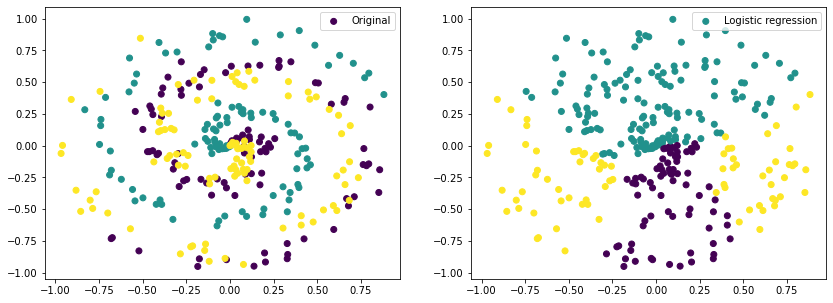

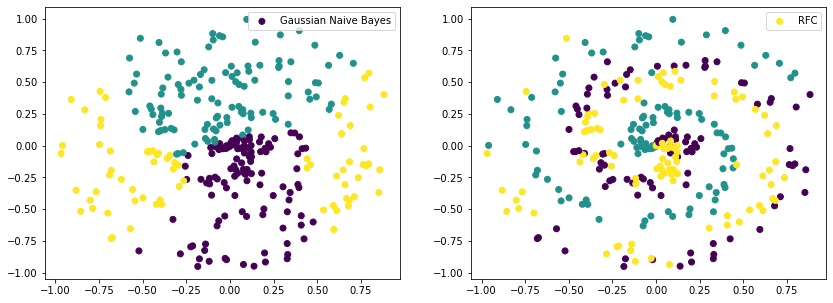

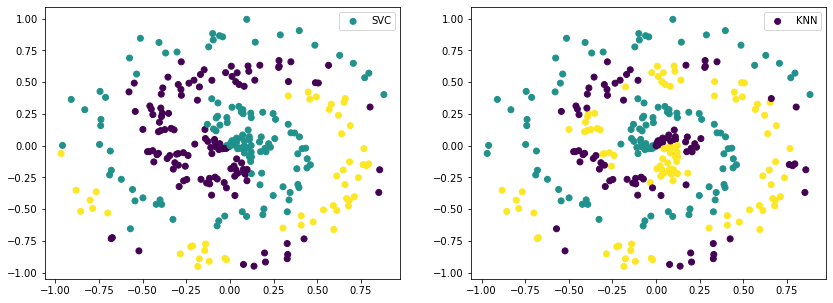

In [64]:
fig1, (ax11, ax12) = plt.subplots(ncols=2, figsize=(14, 5))
fig2, (ax21, ax22) = plt.subplots(ncols=2, figsize=(14, 5))
fig3, (ax31, ax32) = plt.subplots(ncols=2, figsize=(14, 5))

ax11.scatter(X[:,0], X[:,1], label = 'Original', c = y)
ax12.scatter(X[:,0], X[:,1], label = 'Logistic regression', c = pred111)
ax21.scatter(X[:,0], X[:,1], label = 'Gaussian Naive Bayes', c = pred112)
ax22.scatter(X[:,0], X[:,1], label = 'RFC', c = pred113)
ax31.scatter(X[:,0], X[:,1], label = 'SVC', c = pred114)
ax32.scatter(X[:,0], X[:,1], label = 'KNN', c = pred115)

ax11.legend()
ax12.legend()
ax21.legend()
ax22.legend()
ax31.legend()
ax32.legend()

plt.show()

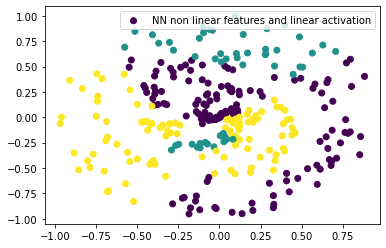

In [72]:
plt.scatter(X[:,0], X[:,1], label = 'NN non linear features and linear activation', c = y_pred_nn51)
plt.legend()
plt.show()

NN with added features and non linear activation!

In [66]:
optimizer2 = keras.optimizers.Adam(learning_rate=0.02)
nn52model = Sequential()
nn52model.add(Dense(21, input_shape=(7,), activation='relu'))
#nn52model.add(Dense(8, activation='relu'))
#nn52model.add(Dense(4, activation='relu'))
#nn52model.add(Dense(4, activation='relu'))
#Output layer
nn52model.add(Dense(3, activation='softmax'))

nn52model.compile(optimizer=optimizer2, loss='sparse_categorical_crossentropy', metrics =['accuracy'])
nn52model.summary()

history = nn52model.fit(Xwithextrafeatures_scaled, y, epochs = 2500)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 21)                168       
                                                                 
 dense_15 (Dense)            (None, 3)                 66        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2500
10/10 [==============================] - 1s 3ms/step - loss: 1.1453 - accuracy: 0.3533
Epoch 2/2500
10/10 [==============================] - 0s 4ms/step - loss: 1.0697 - accuracy: 0.3900
Epoch 3/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0516 - accuracy: 0.3767
Epoch 4/2500
10/10 [==============================] - 0s 3ms/step - loss: 1.0409 - accuracy: 0.3733
Epoch 5/2500
10/10 [==============================] 

10/10 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8133
Epoch 76/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7800
Epoch 77/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8267
Epoch 78/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8233
Epoch 79/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8333
Epoch 80/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8233
Epoch 81/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7933
Epoch 82/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7533
Epoch 83/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8067
Epoch 84/2500
10/10 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8267
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8467
Epoch 156/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8333
Epoch 157/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8233
Epoch 158/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8300
Epoch 159/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8267
Epoch 160/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8467
Epoch 161/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8433
Epoch 162/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8300
Epoch 163/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8500
Epoch 164/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.

10/10 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8500
Epoch 236/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8567
Epoch 237/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8633
Epoch 238/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8500
Epoch 239/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8300
Epoch 240/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.8500
Epoch 241/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8333
Epoch 242/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8767
Epoch 243/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8367
Epoch 244/2500
10/10 [==============================] - 0s 890us/step - loss: 0.3550 - accuracy: 

10/10 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8633
Epoch 316/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8533
Epoch 317/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8467
Epoch 318/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.8700
Epoch 319/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8700
Epoch 320/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.2908 - accuracy: 0.8633
Epoch 321/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8833
Epoch 322/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8867
Epoch 323/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.8800
Epoch 324/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.

10/10 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8600
Epoch 396/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8833
Epoch 397/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.8867
Epoch 398/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8733
Epoch 399/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.8800
Epoch 400/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8800
Epoch 401/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8667
Epoch 402/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8633
Epoch 403/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8533
Epoch 404/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.

10/10 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.8900
Epoch 476/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.8933
Epoch 477/2500
10/10 [==============================] - 0s 887us/step - loss: 0.2880 - accuracy: 0.8733
Epoch 478/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.8833
Epoch 479/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8867
Epoch 480/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.8767
Epoch 481/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.9033
Epoch 482/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.8967
Epoch 483/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9000
Epoch 484/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 

10/10 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8800
Epoch 556/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8767
Epoch 557/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8600
Epoch 558/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.8267
Epoch 559/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.7967
Epoch 560/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8467
Epoch 561/2500
10/10 [==============================] - 0s 935us/step - loss: 0.3097 - accuracy: 0.8467
Epoch 562/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8833
Epoch 563/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8767
Epoch 564/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 

10/10 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9000
Epoch 636/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.8967
Epoch 637/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9100
Epoch 638/2500
10/10 [==============================] - 0s 891us/step - loss: 0.2276 - accuracy: 0.9033
Epoch 639/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9033
Epoch 640/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9000
Epoch 641/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.8833
Epoch 642/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9000
Epoch 643/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8933
Epoch 644/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 

10/10 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.8900
Epoch 716/2500
10/10 [==============================] - 0s 890us/step - loss: 0.2518 - accuracy: 0.9000
Epoch 717/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.8900
Epoch 718/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.8933
Epoch 719/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9033
Epoch 720/2500
10/10 [==============================] - 0s 891us/step - loss: 0.2210 - accuracy: 0.8967
Epoch 721/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.8933
Epoch 722/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9033
Epoch 723/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2176 - accuracy: 0.8933
Epoch 724/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy

10/10 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9067
Epoch 796/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8767
Epoch 797/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9167
Epoch 798/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8967
Epoch 799/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8900
Epoch 800/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8867
Epoch 801/2500
10/10 [==============================] - 0s 933us/step - loss: 0.2462 - accuracy: 0.8900
Epoch 802/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.8900
Epoch 803/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8833
Epoch 804/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 

10/10 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9033
Epoch 876/2500
10/10 [==============================] - 0s 890us/step - loss: 0.2210 - accuracy: 0.8933
Epoch 877/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8967
Epoch 878/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8633
Epoch 879/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.8867
Epoch 880/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.8900
Epoch 881/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9033
Epoch 882/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9033
Epoch 883/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2125 - accuracy: 0.9167
Epoch 884/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy

10/10 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9033
Epoch 956/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9000
Epoch 957/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.8933
Epoch 958/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.8967
Epoch 959/2500
10/10 [==============================] - 0s 1000us/step - loss: 0.2361 - accuracy: 0.9033
Epoch 960/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9067
Epoch 961/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9133
Epoch 962/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2316 - accuracy: 0.8933
Epoch 963/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2206 - accuracy: 0.8967
Epoch 964/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2120 - accur

10/10 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8967
Epoch 1035/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9000
Epoch 1036/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.8900
Epoch 1037/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8833
Epoch 1038/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9000
Epoch 1039/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8867
Epoch 1040/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.9000
Epoch 1041/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9133
Epoch 1042/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.8933
Epoch 1043/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2557 - a

10/10 [==============================] - 0s 1ms/step - loss: 0.2439 - accuracy: 0.9000
Epoch 1114/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.8867
Epoch 1115/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.9067
Epoch 1116/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9100
Epoch 1117/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.8967
Epoch 1118/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8900
Epoch 1119/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8800
Epoch 1120/2500
10/10 [==============================] - 0s 975us/step - loss: 0.2518 - accuracy: 0.9033
Epoch 1121/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8700
Epoch 1122/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3838 - a

10/10 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8967
Epoch 1193/2500
10/10 [==============================] - 0s 888us/step - loss: 0.2176 - accuracy: 0.9067
Epoch 1194/2500
10/10 [==============================] - 0s 978us/step - loss: 0.2069 - accuracy: 0.8967
Epoch 1195/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2078 - accuracy: 0.9000
Epoch 1196/2500
10/10 [==============================] - 0s 888us/step - loss: 0.2691 - accuracy: 0.8933
Epoch 1197/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2795 - accuracy: 0.8933
Epoch 1198/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9067
Epoch 1199/2500
10/10 [==============================] - 0s 890us/step - loss: 0.2534 - accuracy: 0.8833
Epoch 1200/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.9033
Epoch 1201/2500
10/10 [==============================] - 0s 889us/step - loss

10/10 [==============================] - 0s 867us/step - loss: 0.2113 - accuracy: 0.9033
Epoch 1271/2500
10/10 [==============================] - 0s 835us/step - loss: 0.2242 - accuracy: 0.9033
Epoch 1272/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2248 - accuracy: 0.8967
Epoch 1273/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9067
Epoch 1274/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9000
Epoch 1275/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9133
Epoch 1276/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9033
Epoch 1277/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2187 - accuracy: 0.9000
Epoch 1278/2500
10/10 [==============================] - 0s 890us/step - loss: 0.2254 - accuracy: 0.8900
Epoch 1279/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.

10/10 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9000
Epoch 1350/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9100
Epoch 1351/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9000
Epoch 1352/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.8900
Epoch 1353/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8700
Epoch 1354/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8633
Epoch 1355/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.8733
Epoch 1356/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.8967
Epoch 1357/2500
10/10 [==============================] - 0s 890us/step - loss: 0.2168 - accuracy: 0.9133
Epoch 1358/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2227 - a

10/10 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9000
Epoch 1429/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9100
Epoch 1430/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8900
Epoch 1431/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2358 - accuracy: 0.8967
Epoch 1432/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.8933
Epoch 1433/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.8933
Epoch 1434/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9000
Epoch 1435/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8767
Epoch 1436/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9100
Epoch 1437/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2254 - acc

10/10 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.8967
Epoch 1508/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.8967
Epoch 1509/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9067
Epoch 1510/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1992 - accuracy: 0.9133
Epoch 1511/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9033
Epoch 1512/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9100
Epoch 1513/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9067
Epoch 1514/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9067
Epoch 1515/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9100
Epoch 1516/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2075 - acc

10/10 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.8900
Epoch 1587/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.8967
Epoch 1588/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9100
Epoch 1589/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.9033
Epoch 1590/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9067
Epoch 1591/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.8900
Epoch 1592/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9133
Epoch 1593/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9067
Epoch 1594/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.8867
Epoch 1595/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2777 - acc

10/10 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9033
Epoch 1666/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.8967
Epoch 1667/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.8833
Epoch 1668/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9000
Epoch 1669/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.8967
Epoch 1670/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.8900
Epoch 1671/2500
10/10 [==============================] - 0s 893us/step - loss: 0.2258 - accuracy: 0.9033
Epoch 1672/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.8900
Epoch 1673/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2202 - accuracy: 0.9067
Epoch 1674/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2187

10/10 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9133
Epoch 1745/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9100
Epoch 1746/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9033
Epoch 1747/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9067
Epoch 1748/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.8933
Epoch 1749/2500
10/10 [==============================] - 0s 888us/step - loss: 0.2060 - accuracy: 0.9067
Epoch 1750/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9033
Epoch 1751/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2042 - accuracy: 0.9100
Epoch 1752/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9033
Epoch 1753/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2008 - a

10/10 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.8900
Epoch 1824/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9067
Epoch 1825/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.8900
Epoch 1826/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.8933
Epoch 1827/2500
10/10 [==============================] - 0s 891us/step - loss: 0.2428 - accuracy: 0.9000
Epoch 1828/2500
10/10 [==============================] - 0s 974us/step - loss: 0.2226 - accuracy: 0.8933
Epoch 1829/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9000
Epoch 1830/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9033
Epoch 1831/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9033
Epoch 1832/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.1963 -

10/10 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.8933
Epoch 1903/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9033
Epoch 1904/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.8933
Epoch 1905/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.8967
Epoch 1906/2500
10/10 [==============================] - 0s 889us/step - loss: 0.2003 - accuracy: 0.9067
Epoch 1907/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.8967
Epoch 1908/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.8967
Epoch 1909/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.8967
Epoch 1910/2500
10/10 [==============================] - 0s 889us/step - loss: 0.1952 - accuracy: 0.9133
Epoch 1911/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2156 -

10/10 [==============================] - 0s 890us/step - loss: 0.2316 - accuracy: 0.8967
Epoch 1982/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9067
Epoch 1983/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9033
Epoch 1984/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.8933
Epoch 1985/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9100
Epoch 1986/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.8967
Epoch 1987/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2079 - accuracy: 0.8933
Epoch 1988/2500
10/10 [==============================] - 0s 890us/step - loss: 0.2063 - accuracy: 0.9067
Epoch 1989/2500
10/10 [==============================] - 0s 879us/step - loss: 0.2108 - accuracy: 0.8967
Epoch 1990/2500
10/10 [==============================] - 0s 890us/step - loss: 0.22

10/10 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9000
Epoch 2061/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.9033
Epoch 2062/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.9033
Epoch 2063/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9133
Epoch 2064/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2167 - accuracy: 0.9133
Epoch 2065/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.8867
Epoch 2066/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9167
Epoch 2067/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2026 - accuracy: 0.9067
Epoch 2068/2500
10/10 [==============================] - 0s 888us/step - loss: 0.1946 - accuracy: 0.9000
Epoch 2069/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.2217 - a

10/10 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9067
Epoch 2140/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.8967
Epoch 2141/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8800
Epoch 2142/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.8933
Epoch 2143/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9133
Epoch 2144/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9167
Epoch 2145/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9067
Epoch 2146/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9100
Epoch 2147/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9000
Epoch 2148/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2636 - acc

10/10 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9033
Epoch 2219/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9033
Epoch 2220/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9133
Epoch 2221/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9100
Epoch 2222/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9067
Epoch 2223/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9000
Epoch 2224/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9067
Epoch 2225/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9100
Epoch 2226/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9000
Epoch 2227/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2357 - acc

10/10 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.9100
Epoch 2298/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9200
Epoch 2299/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9033
Epoch 2300/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9100
Epoch 2301/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 0.9167
Epoch 2302/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9233
Epoch 2303/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8933
Epoch 2304/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.8900
Epoch 2305/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9233
Epoch 2306/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2067 - acc

10/10 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9000
Epoch 2377/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.8900
Epoch 2378/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.8967
Epoch 2379/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.8967
Epoch 2380/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.8867
Epoch 2381/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9133
Epoch 2382/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9200
Epoch 2383/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9167
Epoch 2384/2500
10/10 [==============================] - 0s 1ms/step - loss: 0.1918 - accuracy: 0.9133
Epoch 2385/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1982 - acc

10/10 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.8900
Epoch 2456/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9100
Epoch 2457/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9067
Epoch 2458/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9200
Epoch 2459/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.8967
Epoch 2460/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9100
Epoch 2461/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9267
Epoch 2462/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9267
Epoch 2463/2500
10/10 [==============================] - 0s 3ms/step - loss: 0.2429 - accuracy: 0.9000
Epoch 2464/2500
10/10 [==============================] - 0s 2ms/step - loss: 0.1968 - acc

In [69]:
y_pred_nn52 = nn52model.predict(Xwithextrafeatures_scaled)
y_pred_nn52 = np.argmax(y_pred_nn52, axis=1)
#print("Coefficient of determination nn3: %.2f" % r2_score(y, y_pred_nn52))
print(classification_report(y, y_pred_nn52)) 

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       100
           1       1.00      0.99      0.99       100
           2       0.88      0.89      0.89       100

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



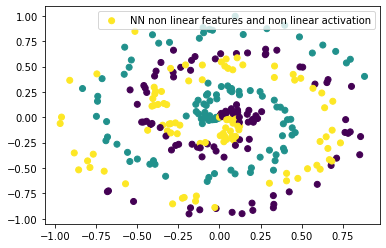

In [71]:
plt.scatter(X[:,0], X[:,1], label = 'NN non linear features and non linear activation', c = y_pred_nn52)
plt.legend()
plt.show()